<a href="https://colab.research.google.com/github/KseniiaTsyganova/Neural-Networks-Diploma/blob/main/ML_NN_Diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Эмоции являются неотемлемым компонентом нашей повседневной жизни. 
Они влияют на наши способы взаимодействия с внешним миром и другими людьми. Они в той или иной степени определяют наши мысли, действия, субъективное восприятие мира, поведенческие ответные реакции.

Согласно теории Клауса Шерера эмоции вмещают в себя 5 синхронизированных процессов:

1. Когнитивная оценка
2. Телесные симптомы (физиологические реакции в центральной и вегетативной нервных системах)
3. Тенденции к действию (мотивационный компонент, который определяет наши реакии или предпринимаемые действия)
4. Выражения лица или голоса
5. Чувства (внутренний опыт, уникальный для каждого отдельного человека)

Пол Экман, американский психолог, выделил 6 базовых эмоций, которые испытывают люди различных культур и возрастов и могут быть понятны ими без разъяснений, в числе которых: гнев (anger), радость (happy), отвращение (disgust), страх (fear), грусть (sad), удивление (surprise). 
В данной работе я буду обучать нейронную сеть распознавать 9 классов эмоций, включая 6 базовых эмоций, нейтральное выражение лица, презрение (contempt) и неопределенное выражение лица (uncertain).

Будем использовать сверточную нейронную сеть (Convolition Neural Network - CNN),так как они показывают наилучшие результаты при работе с изображениями.

Области применения AI-моделей распознавания эмоций - это прежде всего медицина (девайсы для людей с аутизмом, помощь в диагностировании депрессии), маркетинг, видеоигры, персонализация вебсайтов, образование (вовлеченность в процесс), рекоммендательные системы, социальные медиа. Подобные устройства направлены на улучшение качества жизни людей и их опыта взаимодействия с digital сферой.

Трудности в обучении нейронных сетей, распознающих эмоции, заключаются, прежде всего, в данных, которые используются для обучения подобных НС. Разные базы изображений дают разные резуьтаты с одними и теми же нейронными сетями.
Для распознавания эмоций ипользуют датасеты с аудио-материалами, видео-материалы, биометричесие показатели и изображения.
В том, что касается изображений, то здесь можно выделить 2 основных типа датасетов - это статичные изображения в анфас и кадры с лицами из видео и фильмов (такие датафреймы в основном используют в сочетании с реккурентными НС, чтобы включить временное измерение, или с 3D Конволюционными сетями, которые принимают 4-х мерный инпут, вместо 3-х мерного)

В любом случае, задача распознавания эмоций - это одна из сложных задач настоящего времени.


В данной работе 3 части:

1. Эксперименты по обучению CNN на тренировочных данных, которые представляют собой более 50000 фотографий людей в статике, одно лицо на фото, с соответсвующим лейблом, обозначающим эмоцию, для получения необходимого значения метрики categorical accuracy > 0.4. 
2. Valence-arousal подход для обучения модели, когда модель обучается на компонентах разложения эмоций valence (насколько эмоция положительна или отрицательна) и arousal (интенсивность).
3. Интеграции модели распознавания эмоций и веб-камеры для осуществления real-time классификации эмоций. Эта часть работы идет в отдельном файле emotion_web.ipynb, который необходимо запускать на локальной машине.

# **Часть 1.**

Сначала добьемся чтобы посылка на кагл прошла отметку зачет на лидерборде (0.29880)
Будем идти от простого к сложному

In [ ]:
# Выполним подготовку для скачивания датасета с kaggle

In [ ]:
# Создадим на kaggle новый API token
# Скачаем файл kaggle.json
# Загрузим его в colab

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kseniiatsyganova","key":"0bcc63e52bb96bb25afdab88ce70dcc2"}'}

In [ ]:
# расположим загруженный файл в деректорию, где API client ожидает его найти

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Теперь можно получить доступ к датасету используя client

In [ ]:
!kaggle competitions download -c skillbox-computer-vision-project

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.4MB/s]
  0% 0.00/230k [00:00<?, ?B/s]
100% 230k/230k [00:00<00:00, 76.3MB/s]


In [ ]:
# Разархивируем скачанный файл train.csv.zip

In [ ]:
!unzip /content/train.csv.zip -d ./

Archive:  /content/train.csv.zip
  inflating: ./train.csv             


In [ ]:
# Теперь загрузим все необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf

from pathlib import Path

import time

from collections import Counter

!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.metrics import ConfusionMatrixDisplay

import random

from sklearn.model_selection import train_test_split

In [ ]:
data_folder = Path('/content/drive/MyDrive/train.zip (Unzipped Files)/')

In [ ]:
# Посмотрим, что представляет из себя тренировочный датафрейм

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,image_path,emotion
0,0,./train/anger/0.jpg,anger
1,1,./train/anger/1.jpg,anger
2,2,./train/anger/10.jpg,anger
3,3,./train/anger/100.jpg,anger
4,4,./train/anger/1000.jpg,anger


In [ ]:
#Добавим в датафрейм столбец, соответсвующий метке класса

In [ ]:
NUM_CLASSES = len(df.emotion.unique())

In [ ]:
mapping = dict(zip(df.emotion.unique(), range(NUM_CLASSES)))
mapping

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7,
 'uncertain': 8}

In [ ]:
df['class'] = df.emotion.map(mapping)

In [ ]:
df['class'] = df['class'].astype(str)

In [ ]:
df.iloc[8000:8010]

,Unnamed: 0,image_path,emotion,class
8000,8000,./train/contempt/1879.jpg,contempt,1
8001,8001,./train/contempt/188.jpg,contempt,1
8002,8002,./train/contempt/1880.jpg,contempt,1
8003,8003,./train/contempt/1881.jpg,contempt,1
8004,8004,./train/contempt/1882.jpg,contempt,1
8005,8005,./train/contempt/1883.jpg,contempt,1
8006,8006,./train/contempt/1884.jpg,contempt,1
8007,8007,./train/contempt/1885.jpg,contempt,1
8008,8008,./train/contempt/1886.jpg,contempt,1
8009,8009,./train/contempt/1887.jpg,contempt,1


In [ ]:
# Отредактируем значение image_path, уберем первые 2 символа

In [ ]:
df.image_path = df.image_path.apply(lambda x: x[2:])
df.head()

,Unnamed: 0,image_path,emotion,class
0,0,train/anger/0.jpg,anger,0
1,1,train/anger/1.jpg,anger,0
2,2,train/anger/10.jpg,anger,0
3,3,train/anger/100.jpg,anger,0
4,4,train/anger/1000.jpg,anger,0


In [ ]:
# Посмотрим как выгдядят данные

In [ ]:
def show_face(image, emotion):
    '''Принимает на вход изображение 
    и соответствующее значение столбца emotion
    Показывает изображение и выводит эмоцию в названии'''
    
    plt.imshow(image)
    plt.title(f'Emotion: {emotion}')

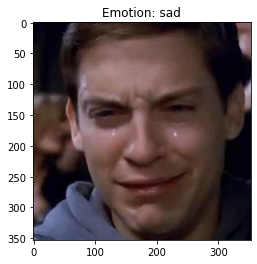

In [ ]:
row = df.iloc[np.random.randint(len(df))]
img = plt.imread(str(data_folder / row['image_path']))
show_face(img, row['emotion'])

In [ ]:
# Посмотрим на распределение данных

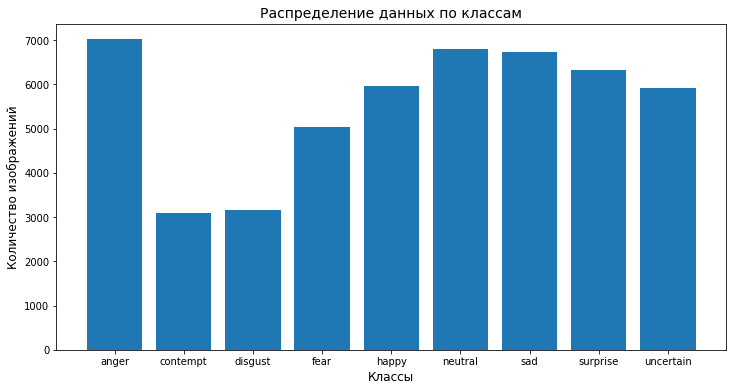

In [ ]:
distrib_dict = dict(Counter(df['emotion']))

x = distrib_dict.keys()
y = [distrib_dict[key] for key in x]

plt.figure(figsize=(12, 6))
plt.bar(x = range(len(x)), height=y)
plt.title('Распределение данных по классам', fontsize=14)
plt.xticks(range(len(x)), labels=x)
plt.xlabel('Классы', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.show()

In [ ]:
# Видно, что данные распределены не совсем равномерно, однако, мы оставим данные в таком виде и попробуем применить тактику обучения НС на несбалансированных данных.

In [ ]:
# Создадим тестовый датафрейм, содержащий пока один столбец image_path
test_data = [f'{i}.jpg'for i in range(5000)]
test_df = pd.DataFrame(test_data, columns=['image_path'])
test_df.head()

,image_path
0,0.jpg
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg


In [ ]:
test_data_folder = Path('/content/drive/MyDrive/test_kaggle.zip (Unzipped Files)/test_kaggle/')

In [ ]:
# Создадим класс Generators, который будет ответственнен за создание генераторов данных
# Подвергающие картинки определенному препроцессингу, аугментации, и пригодными для подачи на обучение модели

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 224

In [ ]:
class Generators:

    '''Создание тренировочного и валидационного генератора'''

    def __init__(self, train_df, test_df):
        self.batch_size = BATCH_SIZE
        self.img_size = (IMAGE_SIZE, IMAGE_SIZE)

        _datagen = ImageDataGenerator(                            # Создаем генераторы данных с искусственным расширением обучающего датасета,
            rescale=1./255.,                                      # аугментацией
            validation_split=0.25,                                # размер валидационного генератора 25%
            featurewise_center=False,
            featurewise_std_normalization=False,
            width_shift_range=0.1,                                # Смещение по ширине - максимум 10 %
            height_shift_range=0.1,                               # Смещение по высоте - максимум 10 %
            horizontal_flip=True,                                 # Отражение относительно центральной вертикали
            brightness_range=[0.9, 1.1],                          # Шкала затемнения-осветления изображения
            zoom_range=0.1                                        # Степень приближения-отдаления
        )

        # Тренировочный генератор

        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=df,
            directory=str(data_folder),
            x_col='image_path',
            y_col='emotion',
            subset='training',
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode='categorical',
            target_size=self.img_size)
        print('Тренировочный генератор создан')

        # Валидационный генератор

        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=df,
            directory=str(data_folder),
            x_col='image_path',
            y_col='emotion',
            subset='validation',
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode='categorical',
            target_size=self.img_size
        )
        print('Валидационный генератор создан')
        # Тестовый генератор (без аугментации)
        _test_datagen=ImageDataGenerator(rescale=1./255.)
        self.test_generator = _test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory = str(test_data_folder),
            x_col='image_path',
            y_col=None,
            class_mode = None,
            batch_size=1,
            seed=42,
            shuffle=False,
            target_size=self.img_size)
        print('Тестовый генератор создан')

In [ ]:
# Создаем генераторы
generators = Generators(df, test_df)
print('Генераторы созданы')

Found 37535 validated image filenames belonging to 9 classes.
Тренировочный генератор создан
Found 12511 validated image filenames belonging to 9 classes.
Валидационный генератор создан
Found 5000 validated image filenames.
Тестовый генератор создан
Генераторы созданы


In [ ]:
# Так как мы будем проводить несколько экспериментов
# Нам удобнее создать воспроизводимую структуру кода - 
# кастомный класс EmotionModel
# методы класса:
 # architecture - для создания архитектуры сети
 # loss_optimizer - компиляция модели
 # learn - обучение модели
 # inference_time - замер времени инференса
 # predict_test - сделать предсказания для тестового датасета и оформить их в необходимый для kaggle формат

In [ ]:
class EmotionModel:
    '''Класс для образования экземпляров различных экспериментов по созданию модели для опредеоения эмоций.
    Создает, компилирует, обучает, измеряет время инференса,
    Делает предсказания для тестового датасета'''

    def __init__(self, generators, batch_size, architecture, low_limit=3):
        self.generators = generators
        self.model = architecture
        self.low_limit = low_limit # по условию нижняя допустимая временная граница инференса 3 кадра/c
        self.throughput = False 
        self.checkpoint = None
        self.cpt_filename = 'checkpoint_best.h5'
        self.batch_size = batch_size

    def loss_optimizer(self, learning_rate, path_to_folder):
        ''' Определяет алгоритм оптимизации и лосс'''
        
        metr = tf.keras.metrics.CategoricalAccuracy()
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[metr])
        
        path = Path(path_to_folder)
        path.mkdir(exist_ok=True)
        cpt_path = str(path/self.cpt_filename)

        self.checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='categorical_accuracy', verbose=1, save_best_only=True, mode='max')


    def learn(self, epochs, path_to_folder, val_steps, train_steps):
        '''Обучение модели'''

        #self.generators.val_generator.reset()
        #self.generators.train_generator.reset()

        self.model.fit(self.generators.train_generator, validation_data=self.generators.val_generator, epochs=epochs, validation_steps=val_steps, callbacks=[PlotLossesCallback(), self.checkpoint], steps_per_epoch=train_steps)
        self.model = load_model(path_to_folder + '/' + self.cpt_filename)

    def inference_time(self):
        '''Производит расчет времени инференса'''

        sample_images, sample_labels = next(self.generators.train_generator)

        N_warmup_run = 50
        N_run = 500
        elapsed_time = []
        for i in range(N_warmup_run):
            preds = self.model.predict(sample_images)
            
        for i in range(N_run):
            start_time = time.time()
            preds = self.model.predict(sample_images)
            end_time = time.time()
            elapsed_time = np.append(elapsed_time, end_time - start_time)
            if i % 50 == 0:
                print('Step {}: {}ms'.format(i, (elapsed_time[-50:].mean())*1000))
        
        throughput = N_run * self.batch_size / elapsed_time.sum()
        print('Throughput: {:.0f} images/s'.format(throughput))
        if throughput < self.low_limit:
            print('Превышено допустимое время инференса. Оптимизируйте модель')
        else:
            self.throughput = True
            print('Инференс в пределах допустимого')
            
    def predict_test(self):
        '''Делает предсказания для тестового датасета,
        оформляет их в csv файл на отправку'''

        self.generators.test_generator.reset()

        filenames = self.generators.test_generator.filenames
        nb_samples = len(filenames)

        predictions = self.model.predict_generator(self.generators.test_generator, verbose=1, steps=nb_samples)
        predicted_class_indices = np.argmax(predictions, axis=1)
        labels = (self.generators.train_generator.class_indices)
        labels = dict((v, k) for k, v in labels.items())
        predictions = [labels[k] for k in predicted_class_indices]
        
        results=pd.DataFrame({'image_path': filenames,
                              'emotion': predictions})
        results.to_csv('emotion_model_res.csv', index=False)
        print('Файл csv создан')


In [ ]:
# Создадим функцию определяющую pipeline эксперимента

def experiment_pipe(model, learning_rate, epochs, val_steps, train_steps, path_to_folder='model'):

    '''Реализует pipeline проведения эксперимента для одной модели распознавания эмоций'''

    print('Измеряем время инференса модели')
    model.inference_time() #Если время инференса позволяет, то pipeline продолажет реализовываться
    if model.throughput:
        print()
        print('-'*30)
        print('Определяем алгоритм оптимизации и лосс')
        model.loss_optimizer(learning_rate, path_to_folder) #компиляция
        
        print()
        print('-'*30)
        print('Обучаем модель')
        model.learn(epochs, path_to_folder, val_steps, train_steps) #обучение

        print()
        print('-'*30)
        print('Осуществляем предсказания модели на тестовом датасете')
        model.predict_test() #предсказание


Начинаем проводить эксперименты.

**Эксперимент 1**

In [ ]:
# Создадим архитетуру НС
# Нам понадобится сверточная сеть с полносвязным классификационным слоем в конце

architecture_1 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
                              tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                              
                              tf.keras.layers.MaxPool2D((2, 2)),

                              tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                              tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),

                              tf.keras.layers.MaxPool2D((2, 2)),

                              tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                              tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),

                              tf.keras.layers.MaxPool2D((2, 2)),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1024, activation='relu'),
                              tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                              ])
architecture_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [ ]:
# Создадим экземпляр класса EmotionModel

emotion_model_1 = EmotionModel(generators=generators, architecture=architecture_1, batch_size=BATCH_SIZE)

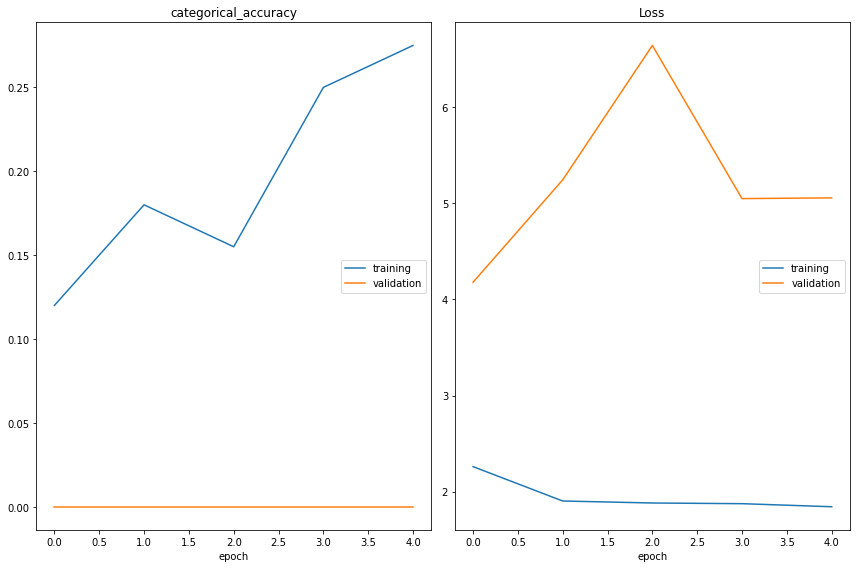

categorical_accuracy
	training         	 (min:    0.120, max:    0.275, cur:    0.275)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.843, max:    2.260, cur:    1.843)
	validation       	 (min:    4.179, max:    6.643, cur:    5.057)

Epoch 00005: categorical_accuracy improved from 0.25000 to 0.27500, saving model to emotion_model_1/checkpoint_best.h5
25/25 [==============================] - 300s 12s/step - loss: 1.8429 - categorical_accuracy: 0.2750 - val_loss: 5.0570 - val_categorical_accuracy: 0.0000e+00

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 3722s 744ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент

experiment_pipe(model=emotion_model_1, learning_rate=0.001, epochs=5, path_to_folder='emotion_model_1', train_steps=25, val_steps=25)

При такой простейшей архитектуре результат посылки на kaggle составил:

public leaderboard - **0.13719**

private leaderboard - **0.14280**

Здесь важно было проверить, что успешно реализован pipeline (что и было проверено),
Далее начнем усложнять архитектуру и применять различные техники для улучшения качетсва работы сети.

                        


**Эксперимент 2**

Во втором эксперименте продублируем архитектуру VGG16 (она гораздо шире представленной в первом эксперименте)
Посмотрим, какой результат даст такое расширение.

In [ ]:
architecture_2 = tf.keras.Sequential([
                                      tf.keras.layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
                                      tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                      
                                      tf.keras.layers.MaxPool2D((2, 2), strides=2),
                                      
                                      tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                      
                                      tf.keras.layers.MaxPool2D((2, 2), strides=2),
                                      
                                      tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                                      
                                      tf.keras.layers.MaxPool2D((2, 2), strides=2),
                                      
                                      tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
                                      
                                      tf.keras.layers.MaxPool2D((2, 2), strides=2),
                                      
                                      tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
                                      tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
                                      
                                      tf.keras.layers.MaxPool2D((2, 2), strides=2),
                                      tf.keras.layers.Flatten(),
                                      
                                      tf.keras.layers.Dense(4096, activation='relu'),
                                      tf.keras.layers.Dense(4096, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])
architecture_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
#Создадим экземпляр класса EmotionModel соответсвующий новой архитектуре

emotion_model_2 = EmotionModel(generators=generators, architecture=architecture_2, batch_size=BATCH_SIZE)

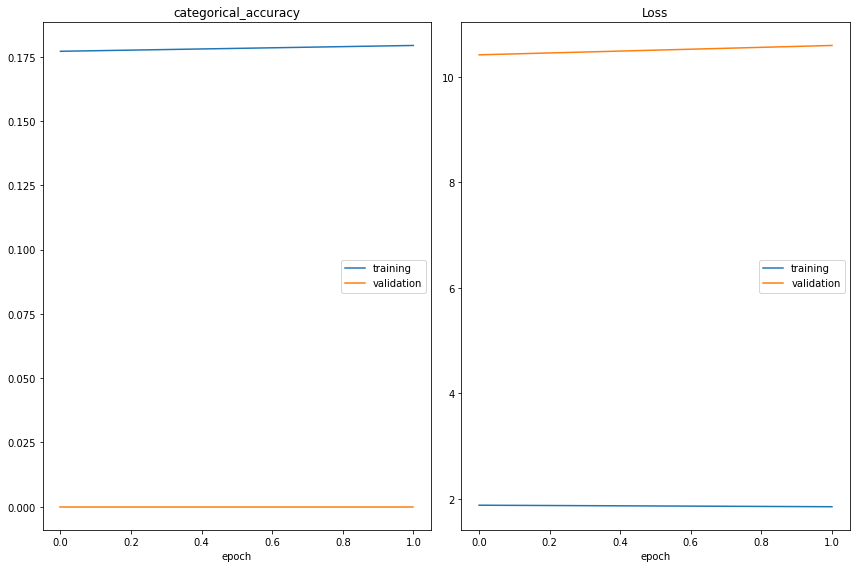

categorical_accuracy
	training         	 (min:    0.177, max:    0.179, cur:    0.179)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.852, max:    1.881, cur:    1.852)
	validation       	 (min:   10.415, max:   10.592, cur:   10.592)

Epoch 00002: categorical_accuracy improved from 0.17713 to 0.17939, saving model to emotion_model_2/checkpoint_best.h5
4691/4691 [==============================] - 1014s 216ms/step - loss: 1.8519 - categorical_accuracy: 0.1794 - val_loss: 10.5923 - val_categorical_accuracy: 0.0000e+00

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 3837s 767ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент

experiment_pipe(model=emotion_model_2, learning_rate=0.001, epochs=2, path_to_folder='emotion_model_2', train_steps=586, val_steps=195)

Результат посылки на kaggle резульататов 2го эксперимента дал небольшое приращение точности и составил:

public leaderboard - **0.14240**

private leaderboard - **0.12760**

Все еще неудовлетворительно. Значительно увеличилось время обучения, 
в третьем эксперименте попробуем воспользоваться transfer learning.

**Эксперимент 3**

В третьем эксперименте воспользуемся transfer learning
Для начала скачаем предобученную модель с весами
Модель была обучена на датасете VGGFace2, который включает в себя более 3 млн изображений с 8631 (именно столько нейронов в последнем полносвязном слое) персоналиями.
Такая модель подойдет лучше для нашей цели, чем обученная на ImageNet, например, в связи с тем, что она уже выучила определенные признаки лиц людей.
Сеть, которую мы будем дообучать мы возьмем из открытого источника: 

https://github.com/rcmalli/keras-vggface 

Однако будем использовать ее скачанную версию.

In [ ]:
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 229MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5") #Модель имеет архитектуру ResNet50

In [ ]:
vggface_model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [ ]:
#Для того, чтобы осуществить transfer learning отрежем от модели последний классификационный слой и заморозим всю модель
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
#Создадим новую архитектуру:
# Для этого к базовой модели привяжем три полносвязных слоя, которые и будем обучать 

architecture_3 = tf.keras.Sequential([base_model,
                                      tf.keras.layers.Dense(4096, activation='relu'),
                                      tf.keras.layers.Dense(4096, activation='relu'), 
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

In [ ]:
# Создадим экземпляр класса EmotionModel соответсвующий новой архитектуре

emotion_model_3 = EmotionModel(generators=generators, architecture=architecture_3, batch_size=BATCH_SIZE)

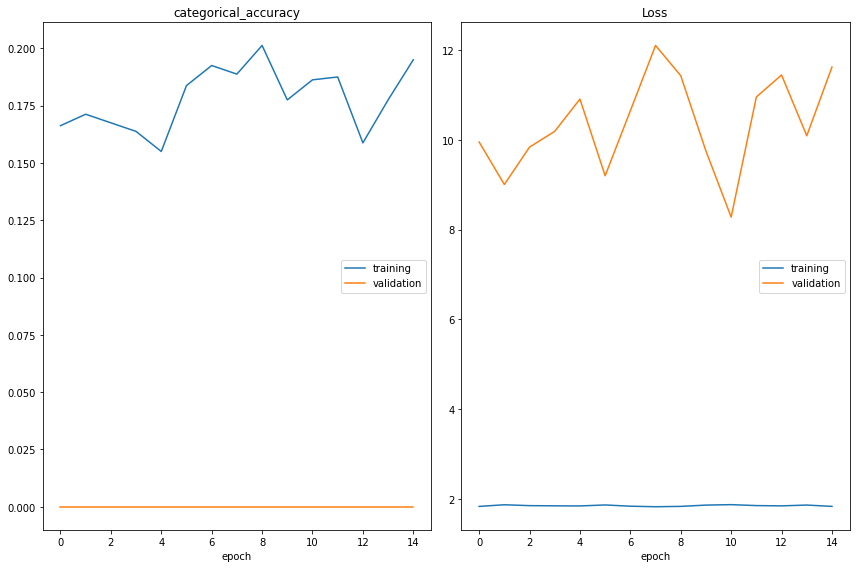

categorical_accuracy
	training         	 (min:    0.155, max:    0.201, cur:    0.195)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.829, max:    1.875, cur:    1.837)
	validation       	 (min:    8.278, max:   12.098, cur:   11.617)

Epoch 00015: categorical_accuracy did not improve from 0.20125
100/100 [==============================] - 473s 5s/step - loss: 1.8367 - categorical_accuracy: 0.1950 - val_loss: 11.6174 - val_categorical_accuracy: 0.0000e+00

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 3738s 748ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент

experiment_pipe(model=emotion_model_3, learning_rate=0.001, epochs=15, path_to_folder='emotion_model_3', train_steps=100, val_steps=50)

Результат посылки на kaggle:

public leaderboard - **0.13719**

private leaderboard - **0.14280**

Что совпадает по точности с первым экспериментом и хуже, чем во втором случае.
Но это может быть потому, что мы обучали лишь последние классификационные слои новой модели.
Предположительно, если увеличить количество обучаемых слоев, то результат будет лучше.
Это мы и сделаем в четвертом эксперименте.

**Эксперимент 4**

Чтобы эксперименты были независимы, снова скачаем базовую модель и сделаем fine tuning

In [ ]:
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 345MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True
print('Количество слоев в базовой модели: ', len(base_model.layers))

#Замораживаем первые 100 слоев базовой модели, остальные оставляем обучаемыми
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Количество слоев в базовой модели:  175


In [ ]:
architecture_4 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(4096, activation='relu'),
                                      tf.keras.layers.Dense(4096, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

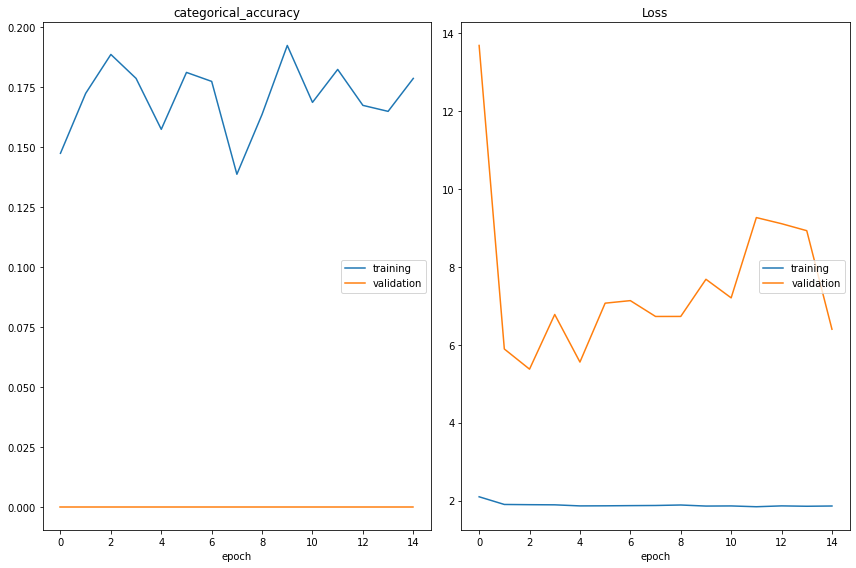

categorical_accuracy
	training         	 (min:    0.139, max:    0.192, cur:    0.179)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.842, max:    2.097, cur:    1.860)
	validation       	 (min:    5.373, max:   13.682, cur:    6.398)

Epoch 00015: categorical_accuracy did not improve from 0.19250
100/100 [==============================] - 325s 3s/step - loss: 1.8604 - categorical_accuracy: 0.1787 - val_loss: 6.3979 - val_categorical_accuracy: 0.0000e+00

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 74s 15ms/step
Файл csv создан


In [ ]:
# Создадим экземпляр класса EmotionModel соответсвующий новой архитектуре

emotion_model_4 = EmotionModel(generators=generators, architecture=architecture_4, batch_size=BATCH_SIZE)

# Проведем эксперимент

experiment_pipe(model=emotion_model_4, learning_rate=0.0001, epochs=15, path_to_folder='emotion_model_4', train_steps=100, val_steps=50)

На этот раз результат посылки на kaggle:

public leaderboard - **0.14240**

private leaderboard - **0.12760**

Принципиально не изменилась точность.
Попробуем изменить некоторые детали и обучать больше времени

**Эксперимент 5**

In [ ]:
# Снова загружаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 302MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

#Теперь заморозим первые 120 слоев базовой модели, остальные оставляем обучаемыми
# Посмотрим как это отразится на качестве
fine_tune_at = 120
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
#Уменьшим ширину модели на выходе и заменим в предпоследнем посносвязном слое функцию активации ReLU на softplus

architecture_5 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(1024, activation='softplus'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

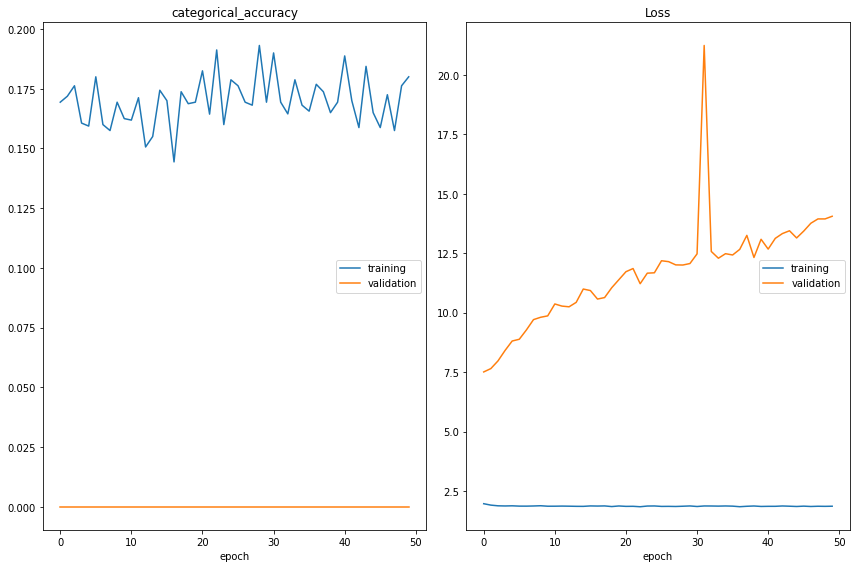

categorical_accuracy
	training         	 (min:    0.144, max:    0.193, cur:    0.180)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.842, max:    1.969, cur:    1.864)
	validation       	 (min:    7.509, max:   21.231, cur:   14.052)

Epoch 00050: categorical_accuracy did not improve from 0.19312
200/200 [==============================] - 102s 510ms/step - loss: 1.8642 - categorical_accuracy: 0.1800 - val_loss: 14.0518 - val_categorical_accuracy: 0.0000e+00

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 74s 15ms/step
Файл csv создан


In [ ]:
# Создадим экземпляр класса EmotionModel соответсвующий новой архитектуре

emotion_model_5 = EmotionModel(generators=generators, architecture=architecture_5, batch_size=BATCH_SIZE)

# Проведем эксперимент

experiment_pipe(model=emotion_model_5, learning_rate=0.0001, epochs=50, path_to_folder='emotion_model_5', train_steps=200, val_steps=50)

Результат посылки на kaggle:

public leaderboard - **0.11800**

private leaderboard - **0.1196**

Результат не улучшается, loss на валидации растет, на обучении нестабилен.
Возможно, возникает проблема затухающего градиента (vanishing gradient) или exploading gradient.

**Эксперимент 6.**

Все еще продолжаем работать с данной моделью.
Немного увеличим количество нейронов,
уменьшим lr, увеличим количество обучаемых слоев.

In [ ]:
# Чтобы эксперименты были независимы, снова скачаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:01<00:00, 123MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

#Теперь заморозим первые 80 слоев базовой модели, остальные оставляем обучаемыми
# Посмотрим как это отразится на качестве
fine_tune_at = 80
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
#Увеличим количество нейронов в Dense слоях и заменим в предпоследнем посносвязном слое функцию активации ReLU

architecture_6 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

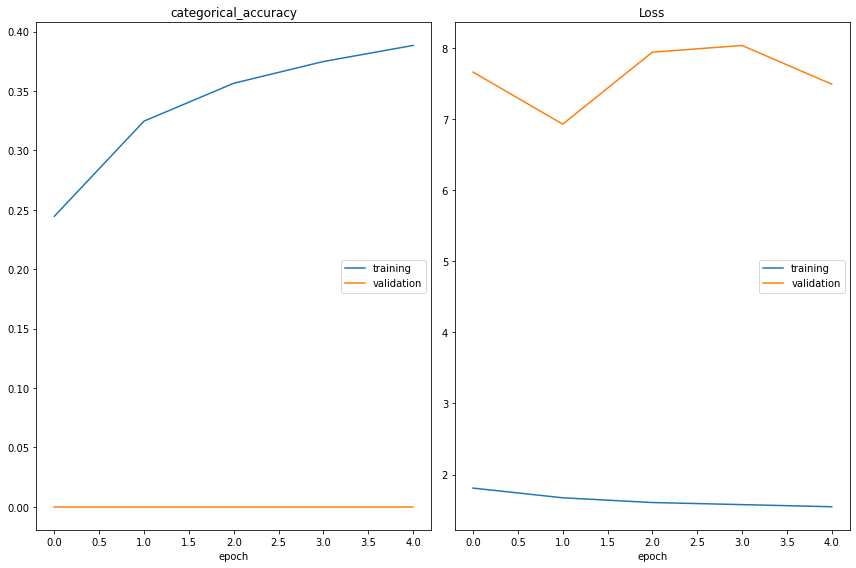

categorical_accuracy
	training         	 (min:    0.245, max:    0.388, cur:    0.388)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    1.548, max:    1.810, cur:    1.548)
	validation       	 (min:    6.927, max:    8.034, cur:    7.490)

Epoch 00005: categorical_accuracy improved from 0.37481 to 0.38833, saving model to emotion_model_6/checkpoint_best.h5
293/293 [==============================] - 1025s 3s/step - loss: 1.5479 - categorical_accuracy: 0.3883 - val_loss: 7.4903 - val_categorical_accuracy: 0.0000e+00

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 1948s 389ms/step
Файл csv создан


In [ ]:
# Создадим экземпляр класса EmotionModel соответсвующий новой архитектуре

emotion_model_6 = EmotionModel(generators=generators, architecture=architecture_6, batch_size=BATCH_SIZE)

# Проведем эксперимент
# 37535 - количество изображений в тренировочном генераторе, 12511 - валидационный генератор
# Уменьшим learning rate до 10е-6, сократим количество эпох, подадим все доступные изображения в модель

experiment_pipe(model=emotion_model_6, learning_rate=0.00001, epochs=5, path_to_folder='emotion_model_6', train_steps=(37535//(BATCH_SIZE*2)), val_steps=(12511//(BATCH_SIZE*2)))

Посылка на kaggle составила:

public leaderboard - **0.31480**

private leadearboard - **0.29480**

Таким образом мы добились существенного улучшений качества работы модели.
Однако модель обучалась всего 5 эпох.
Посмотрим в следующем эксперименте, как изменится качество модели, если увеличить количество эпох обучения. 

**Эксперимент 7**

In [ ]:
# Оставим все то же самое попробуем увеличить количество эпох

# Чтобы эксперименты были независимы, снова скачаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:02<00:00, 67.9MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

fine_tune_at = 80
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
architecture_7 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

In [ ]:
# Создадим экземпляр класса EmotionModel соответсвующий новой архитектуре

emotion_model_7 = EmotionModel(generators=generators, architecture=architecture_7, batch_size=BATCH_SIZE)

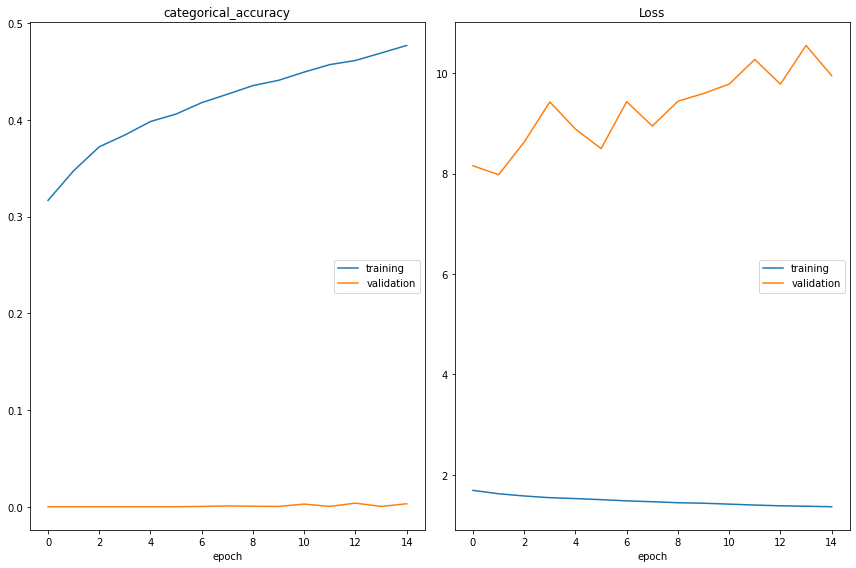

categorical_accuracy
	training         	 (min:    0.317, max:    0.477, cur:    0.477)
	validation       	 (min:    0.000, max:    0.004, cur:    0.003)
Loss
	training         	 (min:    1.366, max:    1.692, cur:    1.366)
	validation       	 (min:    7.978, max:   10.553, cur:    9.951)

Epoch 00015: categorical_accuracy improved from 0.46910 to 0.47690, saving model to emotion_model_7/checkpoint_best.h5
293/293 [==============================] - 425s 1s/step - loss: 1.3657 - categorical_accuracy: 0.4769 - val_loss: 9.9511 - val_categorical_accuracy: 0.0031

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 3760s 752ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 37535 - количество изображений в тренировочном генераторе, 12511 - валидационный генератор
# Увеличим количество эпох с 5 до 15

experiment_pipe(model=emotion_model_7, learning_rate=0.00001, epochs=15, path_to_folder='emotion_model_7', train_steps=(37535//(BATCH_SIZE*2)), val_steps=(12511//(BATCH_SIZE*2)))

Посылка на kaggle составила:

public leaderboard - **0.31280**

private leaderboard- **0.30240**

Таким образом, удалось добиться незначительного приращения точности на public по сравнению с предыдущим экспериментом.

Но кардинальным образом точность на public не изменилась, даже немного уменьшилась.
Скорее всего, это связано с самим процессом обучения, тем какой путь выбирает для себя градиент.

Еще мы можем заметить, что точность на тренировочном сете стабильно растет, но и loss на валидации растет.
Это может говорить о переобучении модели на тренировочных данных.

Соответственно, нам нужно увеличить количество обучающих данных, чтобы попробовать справиться с этой проблемой.

Сделать это будет просто в восьмом эксперименте, так как обучали мы нашу модель всего на половине тренировочного сета, то на этот раз мы возьмем весь.

Посмотрим, удастся ли нам повысить точность посылки.

**Эксперимент 8**

In [ ]:
# Оставим все то же самое, но обучать будем на полном тренировочном датасете, а не на половине

# Чтобы эксперименты были независимы, снова скачаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 324MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

fine_tune_at = 80
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
architecture_8 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

In [ ]:
# Создадим экземпляр класса EmotionModel

emotion_model_8 = EmotionModel(generators=generators, architecture=architecture_8, batch_size=BATCH_SIZE)

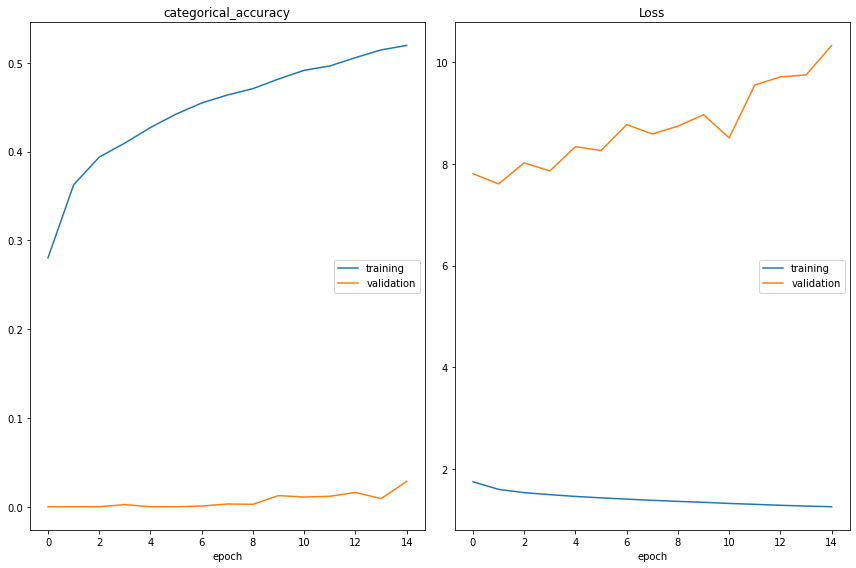

categorical_accuracy
	training         	 (min:    0.280, max:    0.520, cur:    0.520)
	validation       	 (min:    0.000, max:    0.029, cur:    0.029)
Loss
	training         	 (min:    1.256, max:    1.748, cur:    1.256)
	validation       	 (min:    7.607, max:   10.329, cur:   10.329)

Epoch 00015: categorical_accuracy improved from 0.51464 to 0.51966, saving model to emotion_model_8/checkpoint_best.h5
586/586 [==============================] - 763s 1s/step - loss: 1.2562 - categorical_accuracy: 0.5197 - val_loss: 10.3295 - val_categorical_accuracy: 0.0285

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 3756s 751ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 37535 - количество изображений в тренировочном генераторе, 12511 - валидационный генератор
# Для обучения возьмем тренировочный генератор полностью

experiment_pipe(model=emotion_model_8, learning_rate=0.00001, epochs=15, path_to_folder='emotion_model_8', train_steps=(37535//BATCH_SIZE), val_steps=(12511//(BATCH_SIZE*2)))

Результат восьмого эксперимента:

public leaderboard - **0.38400**

private leaderboard - **0.37320**

Таким образом удалось достичь значительного приращения точности работы модели.
Чтобы преодолеть желаемую отметку в 0.4 на private leaderboard, принципиально не изменяя подход, потому что он неплохо себя зарекомендовал, еще раз пройти процесс обучения, однако увеличить количество эпох до 25 и увеличить количество данных на валидации. Мы использовали половину валидационного датасета, теперь используем весь. Посмотрим, каких результатов удастся достичь в таком случае.


**Эксперимент 9**

In [ ]:
# Оставим все то же самое, но обучать будем на 10 эпох дольше, а именно 25 эпох
# И для валидации использовать весь валидационный сет

# Чтобы эксперименты были независимы, снова скачаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:02<00:00, 63.7MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

fine_tune_at = 80
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
architecture_9 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

In [ ]:
# Создадим экземпляр класса EmotionModel

emotion_model_9 = EmotionModel(generators=generators, architecture=architecture_9, batch_size=BATCH_SIZE)

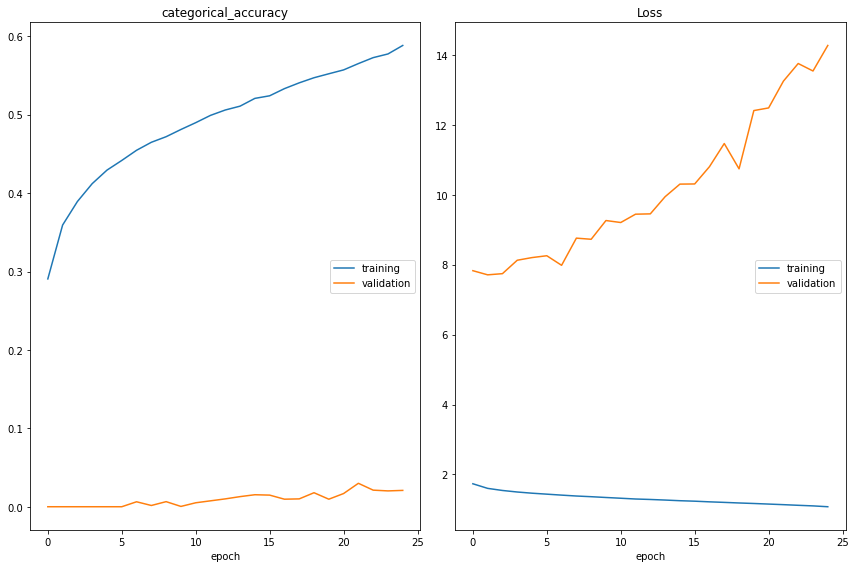

categorical_accuracy
	training         	 (min:    0.291, max:    0.588, cur:    0.588)
	validation       	 (min:    0.000, max:    0.030, cur:    0.021)
Loss
	training         	 (min:    1.076, max:    1.733, cur:    1.076)
	validation       	 (min:    7.709, max:   14.269, cur:   14.269)

Epoch 00025: categorical_accuracy improved from 0.57743 to 0.58827, saving model to emotion_model_9/checkpoint_best.h5
586/586 [==============================] - 942s 2s/step - loss: 1.0761 - categorical_accuracy: 0.5883 - val_loss: 14.2687 - val_categorical_accuracy: 0.0208

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 3795s 759ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 37535 - количество изображений в тренировочном генераторе, 12511 - валидационный генератор
# Для обучения возьмем тренировочный генератор полностью

experiment_pipe(model=emotion_model_9, learning_rate=0.00001, epochs=25, path_to_folder='emotion_model_9', train_steps=(37535//BATCH_SIZE), val_steps=(12511//BATCH_SIZE))

Результат посылки на kaggle:

public leaderboard - **0.38520**

pravate leaderboard - **0.38600**

Таким образом, удалось добиться небольшого увеличения точности за счет значительного увеличения времени обучения.

Таким образом, можно сделать вывод, что увеличение числа валидационных данных и эпох коренным образом не влияют на точность.
Однако у нас получилось добиться хорошего приращения точности в одном из предыдущих экспериментов за счет увеличения числа тренировочных данных. Попробуем в таком случае обучить нашу модель и на валидационном датасете и на тренировочном.

**Эксперимент 10**

Для того чтобы обучить модель и на тренировочном и на валидационном датасете создадим новый класс Generators2Type

In [ ]:
class Generators2Type:

    '''Создание тренировочного и валидационного генератора'''

    def __init__(self, train_df, test_df):
        self.batch_size = BATCH_SIZE
        self.img_size = (IMAGE_SIZE, IMAGE_SIZE)

        _datagen = ImageDataGenerator(                            # Создаем генераторы данных с искусственным расширением обучающего датасета,
            rescale=1./255.,                                      # аугментацией
            validation_split=0.05,                                # Размер валидационного датасета - 5% от общего числа изображений
            featurewise_center=False,
            featurewise_std_normalization=False,
            width_shift_range=0.1,                                # Смещение по ширине - максимум 10 %
            height_shift_range=0.1,                               # Смещение по высоте - максимум 10 %
            horizontal_flip=True,                                 # Отражение относительно центральной вертикали
            brightness_range=[0.9, 1.1],                          # Шкала затемнения-осветления изображения
            zoom_range=0.1                                        # Степень приближения-отдаления
        )

        # Тренировочный генератор

        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=df,
            directory=str(data_folder),
            x_col='image_path',
            y_col='emotion',
            subset='training',
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode='categorical',
            target_size=self.img_size)
        print('Тренировочный генератор создан')

        # Валидационный генератор

        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=df,
            directory=str(data_folder),
            x_col='image_path',
            y_col='emotion',
            subset='validation',
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode='categorical',
            target_size=self.img_size
        )
        print('Валидационный генератор создан')
        # Тестовый генератор (без аугментации)
        _test_datagen=ImageDataGenerator(rescale=1./255.)
        self.test_generator = _test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory = str(test_data_folder),
            x_col='image_path',
            y_col=None,
            class_mode = None,
            batch_size=1,
            seed=42,
            shuffle=False,
            target_size=self.img_size)
        print('Тестовый генератор создан')

In [ ]:
# Создаем генераторы
generators_2_type = Generators2Type(df, test_df)
print('Генераторы созданы')

Found 47544 validated image filenames belonging to 9 classes.
Тренировочный генератор создан
Found 2502 validated image filenames belonging to 9 classes.
Валидационный генератор создан
Found 5000 validated image filenames.
Тестовый генератор создан
Генераторы созданы


In [ ]:
# Оставим все то же самое, но обучать будем 20 эпох, а также использовать расширенный тренировочный генератор

# Чтобы эксперименты были независимы, снова скачаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:01<00:00, 126MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

fine_tune_at = 80
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
architecture_10 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

In [ ]:
# Создадим экземпляр класса EmotionModel

emotion_model_10 = EmotionModel(generators=generators_2_type, architecture=architecture_10, batch_size=BATCH_SIZE)

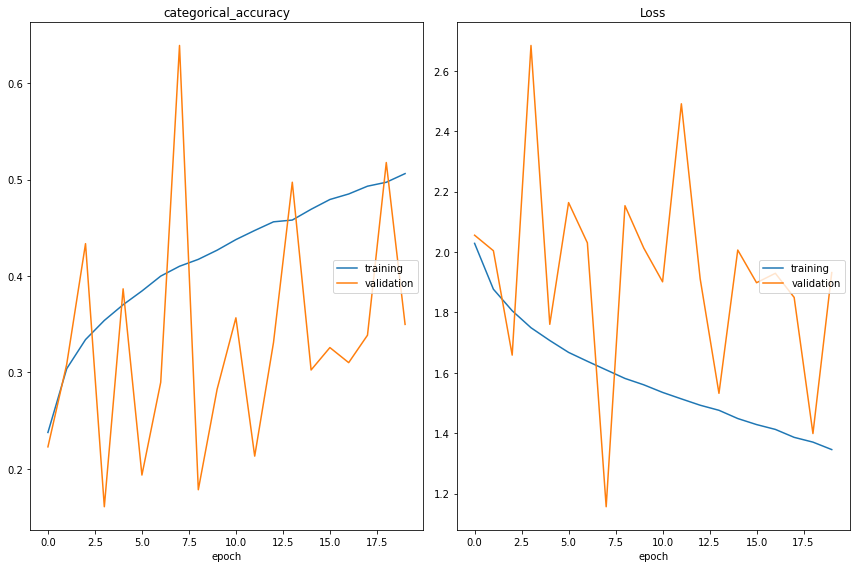

categorical_accuracy
	training         	 (min:    0.238, max:    0.506, cur:    0.506)
	validation       	 (min:    0.161, max:    0.639, cur:    0.350)
Loss
	training         	 (min:    1.345, max:    2.028, cur:    1.345)
	validation       	 (min:    1.156, max:    2.684, cur:    1.932)

Epoch 00020: categorical_accuracy improved from 0.49716 to 0.50613, saving model to emotion_model_10/checkpoint_best.h5
742/742 [==============================] - 939s 1s/step - loss: 1.3455 - categorical_accuracy: 0.5061 - val_loss: 1.9315 - val_categorical_accuracy: 0.3498

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 1891s 378ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 47544 - количество изображений в тренировочном генераторе, 2502 - валидационный генератор

experiment_pipe(model=emotion_model_10, learning_rate=0.00001, epochs=20, path_to_folder='emotion_model_10', train_steps=(47544//BATCH_SIZE), val_steps=(2502//BATCH_SIZE))

Результат посылки на kaggle:

public - **0.42600**

private - **0.42960**

Можно сделать вывод, что чем больше обучающих данных, тем лучший результат categorical accuracy модель показывает.

Accuracy на train dataset по мере возрастания количества пройденнных эпох стабильно растет, а loss уменьшается.

Loss и accuracy на валидации довольно нестабильны.

Мы добились необходимого результата, теперь можно сохранить обученную модель, потому что она нам может еще пригодиться.
Затем осуществить предсказания модели на тренировочном датасете и составить confusion matrix, чтобы посмотреть с определением какой категории эмоций модель справляется лучше всего, а с какой хуже всего.

Сохраняем модель

In [ ]:
emotion_model_10.model.save('./saved_model/1')

INFO:tensorflow:Assets written to: ./saved_model/1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Архивируем модель

In [ ]:
!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/1/ (stored 0%)
  adding: saved_model/1/keras_metadata.pb (deflated 96%)
  adding: saved_model/1/variables/ (stored 0%)
  adding: saved_model/1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/1/variables/variables.index (deflated 79%)
  adding: saved_model/1/saved_model.pb (deflated 92%)
  adding: saved_model/1/assets/ (stored 0%)


Для того чтобы осуществить предсказания на тренировочном датасете, создадим новый генератор изображений perform_generator, без аугментации и включающий весь тренировочный датасет.

In [ ]:
tr_datagen = ImageDataGenerator(rescale=1./255.)
perform_generator = tr_datagen.flow_from_dataframe(dataframe=df, directory=str(data_folder), x_col='image_path', y_col='emotion', batch_size=1, shuffle=False, seed=42, target_size=(IMAGE_SIZE, IMAGE_SIZE))

filenames = perform_generator.filenames
nb_samples = len(filenames)
ground_truth = []

for i in range(nb_samples):
    _, sample_labels = next(perform_generator)
    ground_truth.append(sample_labels)

predictions = emotion_model_10.model.predict(perform_generator, verbose=1, steps=nb_samples)
predicted_class_indices = np.argmax(predictions, axis=1)
labels = perform_generator.class_indices
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Запишем предсказания в датафрейм res_conf и сохраним в csv файл
res_conf = pd.DataFrame({'y_true': ground_truth, 'y_pred': predictions})
res_conf.to_csv('per_confusion.csv', index=False)


Found 50046 validated image filenames belonging to 9 classes.
50046/50046 [==============================] - 869s 17ms/step


In [ ]:
#теперь откроем датафрейм из csv файла, так как среда выполнения была перезапущена

confusion_df = pd.read_csv('/content/per_confusion.csv')
confusion_df.head()

,y_true,y_pred
0,[[1. 0. 0. 0. 0. 0. 0. 0. 0.]],anger
1,[[1. 0. 0. 0. 0. 0. 0. 0. 0.]],surprise
2,[[1. 0. 0. 0. 0. 0. 0. 0. 0.]],anger
3,[[1. 0. 0. 0. 0. 0. 0. 0. 0.]],disgust
4,[[1. 0. 0. 0. 0. 0. 0. 0. 0.]],neutral


In [ ]:
# Мы видим что колонки в датафрейме у нас получились в разном формате, поэтому их нужно привести к одному формату
# чтобы затем использовать в confusion matrix

mapping_rev = dict((v, k) for (k, v) in mapping.items())
mapping_rev

y_true = confusion_df.y_true.values
predicted_tr_indices = [np.argmax([float(i) for i in s[2:-3].split(' ')]) for s in y_true]
ground_truth = [mapping_rev[k] for k in predicted_tr_indices]

#Проверим, что все правильно, измерим длину вектора ground_truth и посморим как выглядит элемент
print(len(ground_truth), ground_truth[0])

50046 anger


In [ ]:
y_pred = list(confusion_df.y_pred.values)

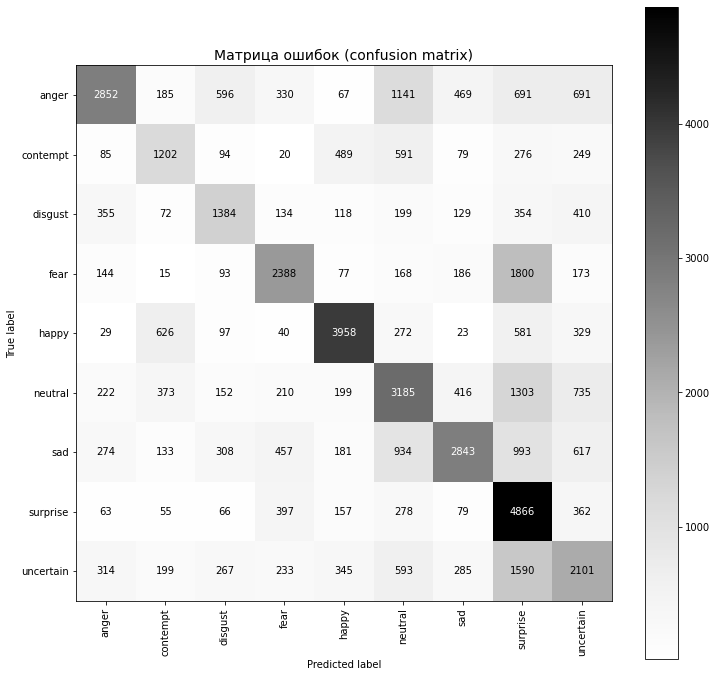

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay.from_predictions(ground_truth, y_pred, cmap='Greys', xticks_rotation='vertical', ax=ax)
ax.set_title('Матрица ошибок (confusion matrix)', fontsize=14)
plt.show()

In [ ]:
distrib_dict

{'anger': 7022,
 'contempt': 3085,
 'disgust': 3155,
 'fear': 5044,
 'happy': 5955,
 'neutral': 6795,
 'sad': 6740,
 'surprise': 6323,
 'uncertain': 5927}

Точность определения:

1. surprise - **76,96%** (4866 из 6323 изображений определены правильно)
2. happy - **66,47%** (3958 из 5955 изображений определены правильно)
3. fear - **47.34%** (2388 из 5044 изображений определены правильно)
4. neutral - **46.87%** (3185 из 6795 изображений определены правильно)
5. disgust - **43.87%** (1384 из 3155 изображений определены правильно)
6. sad - **42.18%** (2843 из 6740 изображений определены правильно)
7. anger - **40,62%**(2852 из 7022 изображений определены правильно)
8. contempt - **38.96%** (1202 из 3085 изображений определены правильно)
9. uncertain - **35.45%** (2101 из 5927 изображений определены правильно)


*Вывод: модель лучше всего справилась с определением удивления (surprise) и счастья (happy). Хуже всего у модели получилось выявить презрение (contempt) и неопределенную эмоцию (uncertain).*

Прежде, чем переходить ко второй части и обучению модели распознавания эмоций с помощью valence-arousal подхода, хочу провести еще один дополнительный эксперимент. Заключаться он будет в обучении такой же модели, как и в предыдущем эксперименте, однако во время всех предыдущих экспериментах, основанных на fine-tuning заранее обученной модели мы файнтюнили только определенное количество слоев, чего было достаточно для получения желаемой точности. В дополнительном эксперименте мы будем делать fine-tuning всех слоев
предобученной модели. Посмотрим, как это отразится на качестве. Для обучения будем использовать расширенный тренировочный датасет.

**Эксперимент 11 (дополнительный)**

In [ ]:
# Чтобы эксперименты были независимы, снова скачаем модель

! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 176MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
# Оставляем все слои обучаемыми

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

In [ ]:
architecture_11 = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
                                      ])

In [ ]:
# Создадим экземпляр класса EmotionModel

emotion_model_11 = EmotionModel(generators=generators_2_type, architecture=architecture_11, batch_size=BATCH_SIZE)

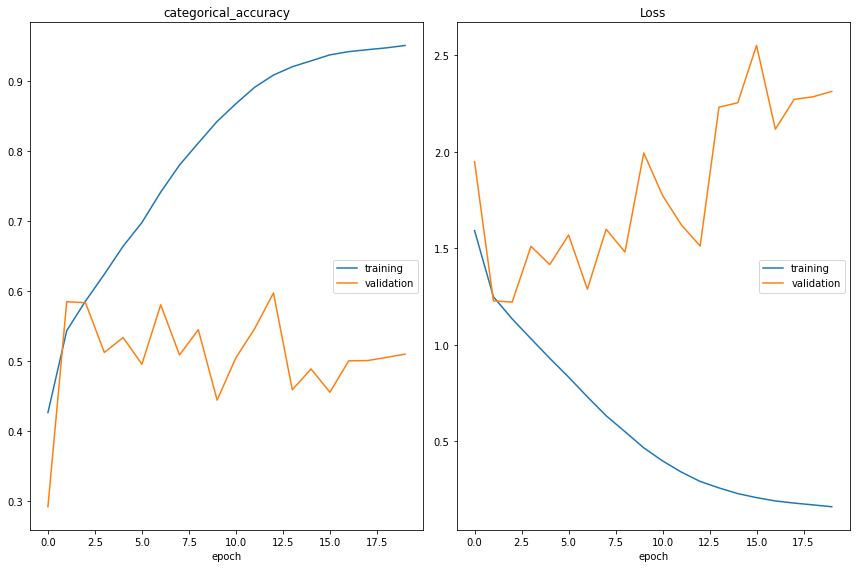

categorical_accuracy
	training         	 (min:    0.427, max:    0.951, cur:    0.951)
	validation       	 (min:    0.292, max:    0.597, cur:    0.510)
Loss
	training         	 (min:    0.162, max:    1.592, cur:    0.162)
	validation       	 (min:    1.222, max:    2.552, cur:    2.314)

Epoch 00020: categorical_accuracy improved from 0.94737 to 0.95080, saving model to emotion_model_11/checkpoint_best.h5
742/742 [==============================] - 926s 1s/step - loss: 0.1619 - categorical_accuracy: 0.9508 - val_loss: 2.3135 - val_categorical_accuracy: 0.5100

------------------------------
Осуществляем предсказания модели на тестовом датасете


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


5000/5000 [==============================] - 2347s 469ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 47544 - количество изображений в тренировочном генераторе, 2502 - валидационный генератор

experiment_pipe(model=emotion_model_11, learning_rate=0.00001, epochs=20, path_to_folder='emotion_model_11', train_steps=(47544//BATCH_SIZE), val_steps=(2502//BATCH_SIZE))

Результат посылки на kaggle:

public leaderboard - **0.51640**

private leaderboard - **0.49880**

Таким образом, эксперимент показал, что fine-tuning всех слоев заранее предобученной модели, дал ощутимый прирост к качеству работы модели, по сравнению с fine-tuning только последних 95 слоев. Это говорит о том, что модель лучше спраляется с задачей, если может выделить черты на более ранних картах признаков с меньшим рецептивным полем.

В целом loss и accuracy на валидации кажутся более стабильными, чем в предыдущем эксперименте.
Loss и accuracy на тренировочном датасете стабильно улучшаются без скачков.

In [ ]:
# Сохраняем модель, как показавшую наилучшую точность

emotion_model_11.model.save('./saved_model/1')

INFO:tensorflow:Assets written to: ./saved_model/1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
# Архивируем модель

!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/1/ (stored 0%)
  adding: saved_model/1/assets/ (stored 0%)
  adding: saved_model/1/keras_metadata.pb (deflated 96%)
  adding: saved_model/1/variables/ (stored 0%)
  adding: saved_model/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: saved_model/1/variables/variables.index (deflated 80%)
  adding: saved_model/1/saved_model.pb (deflated 92%)


In [ ]:
# Для этой модели также создадим confusion matrix
# Для этого создадим генератор данных для всего тренировочного датасета

tr_datagen = ImageDataGenerator(rescale=1./255.)
perform_generator = tr_datagen.flow_from_dataframe(dataframe=df, directory=str(data_folder), x_col='image_path', y_col='emotion', batch_size=1, shuffle=False, seed=42, target_size=(IMAGE_SIZE, IMAGE_SIZE))

filenames = perform_generator.filenames
nb_samples = len(filenames)
ground_truth = []

for i in range(nb_samples):
    _, sample_labels = next(perform_generator)
    ground_truth.append(sample_labels)

Found 50046 validated image filenames belonging to 9 classes.


In [ ]:
mapping_rev = dict((v, k) for (k, v) in mapping.items())
mapping_rev

gr_tr = [list(i[0]) for i in ground_truth]
predicted_tr_indices = [np.argmax(i) for i in gr_tr]
ground_truth = [mapping_rev[k] for k in predicted_tr_indices]

# Сделаем предсказания для тренировочного датасета

predictions = emotion_model_11.model.predict(perform_generator, verbose=1, steps=nb_samples)
predicted_class_indices = np.argmax(predictions, axis=1)
labels = perform_generator.class_indices
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Запишем предсказания в датафрейм res_conf и сохраним в csv файл
res_conf = pd.DataFrame({'y_true': ground_truth, 'y_pred': predictions})
res_conf.to_csv('per_confusion.csv', index=False)

50046/50046 [==============================] - 767s 15ms/step


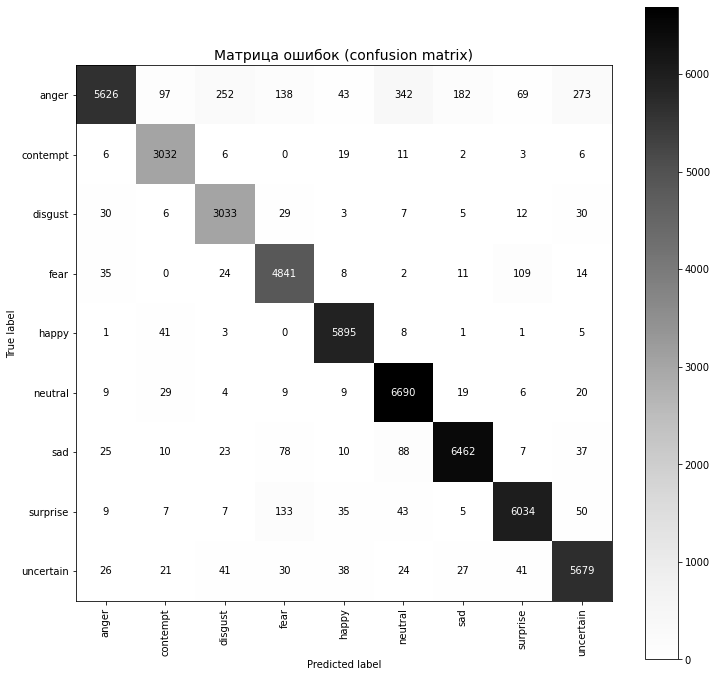

In [ ]:
# Создадим confusion matrix

fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay.from_predictions(ground_truth, predictions, cmap='Greys', xticks_rotation='vertical', ax=ax)
ax.set_title('Матрица ошибок (confusion matrix)', fontsize=14)
plt.show()

In [ ]:
distrib_dict

{'anger': 7022,
 'contempt': 3085,
 'disgust': 3155,
 'fear': 5044,
 'happy': 5955,
 'neutral': 6795,
 'sad': 6740,
 'surprise': 6323,
 'uncertain': 5927}

Так как модель переобучилась на тренировочном датасете, здесь важно смотреть не на саму точность, а, скорее, на сравнение результатов

Точность определения:


1. happy - **98.99%** (5895 из 5955 изображений определены правильно)
2. neutral - **98.45%** (6690 из 6795 изображений определены правильно)
3. contempt - **98.28%** (3032 из 3085 изображений определены правильно)
4. disgust - **96.13%** (3033 из 3155 изображений определены правильно)
5. fear - **95.98%** (4841 из 5044 изображений определены правильно)
6. sad - **95.88%** (6462 из 6740 изображений определены правильно)
7. uncertain - **95.82%** (5679 из 5927 изображений определены правильно)
8. surprise - **95.43%** (6034 из 6323 изображений определены правильно)
9. anger - **80.12%**(5626 из 7022 изображений определены правильно)



*Вывод: модель лучше всего справилась с определением нейтрального выражения лица (neutral) и счастья (happy). Заметно хуже остальных у модели получилось выявить злость (anger), чаще всего модель путала злость с нейтральной эмоцией (342), с неопределенным выражением лица (273), и с отвращением (252).*

Сравнительная таблица

# **Часть 2**

**Valence-Arousal подход**

Согласно размерному подходу (dimensional approach), аффективное поведение описывается некоторым числом скрытых непрерывных измерений.
Наиболее часто встречаемые размеры - это valence (указывающий насколько положительно или отрицательно эмоциональное состояние) и arousal (измеряющий силу эмоциональной активности). Valence и arousal легко разрличимо относятся к конкретным функциям определенных областей мозга.
Теменная область правого полушария мозга играет определенную роль в опосредовании возбуждения (mediation of arousal). В то время как фронтальные области играют определенную роль в эмоциональной валентности (emotional valence). 
Еще есть третье измерение напряжение (tension), но оно часто исключается в связи с трудностью постоянного определения, что это измерение описывает: напряжение, контроль или действенность (преобладание - dominance).

Источник: 'Exploiting multi-CNN features in CNN-RNN based Dimensional Emotion Recognition on the OMG in-the-wild Dataset' by Dimitrios Kollias and Stefanos Zafeiriou e with the Department of Computing, Imperial College London, United Kingdom


Ниже представлены графики, показывающие отношение valense-arousal в 2D и 3D.

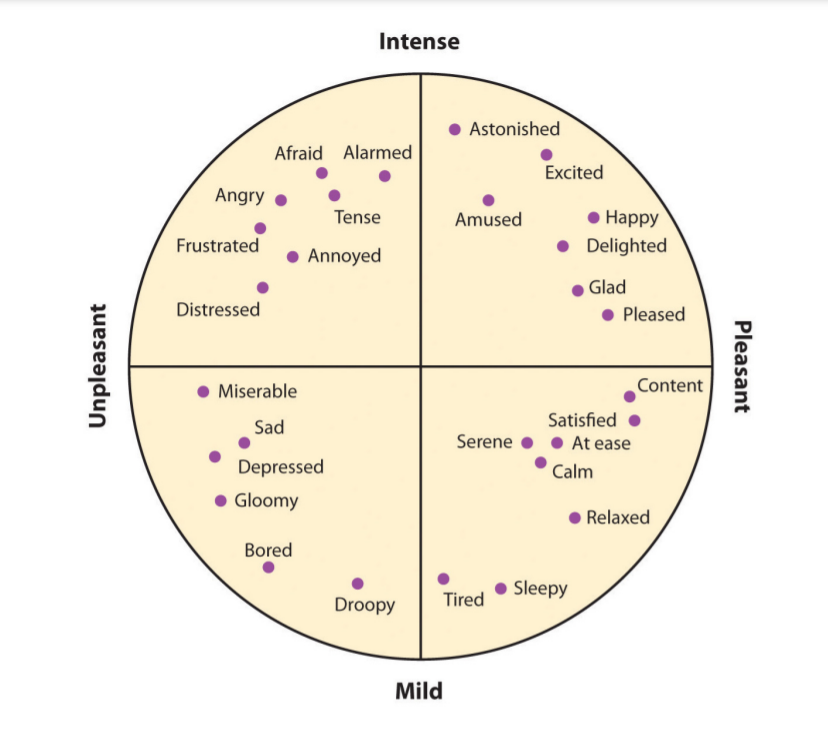

*Источник изображения: 'Exploiting multi-CNN features in CNN-RNN based Dimensional Emotion Recognition on the OMG in-the-wild Dataset' by Dimitrios Kollias and Stefanos Zafeiriou e with the Department of Computing, Imperial College London, United Kingdom*

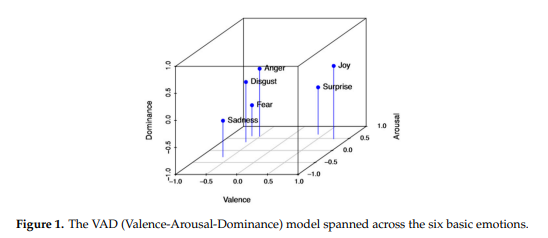

*Источник изображения: "Emotion Classification Based on Biophysical Signals
and Machine Learning Techniques" by Oana Bălan, Gabriela Moise, Livia Petrescu, Alin Moldoveanu, Marius Leordeanu and Florica Moldoveanu*


Алгоритм действий для осуществления данного подхода такой:

1. Присваиваем каждому изображению из тренировочного датасета значение valence и arousal в соответствии с изображенной эмоцией. Значение для каждой эмоции берем из приведенной ниже таблицы.
2. Далее обучаем 2 сверточных нейронных сети для предсказания значений valence и arousal соответственно.
3. Делаем предсказание valence и arousal для тестового датасета.
4. Обучаем полносвязную нейронную сеть MLP для предсказания эмоций по значениям valence и arousal.
5. Делаем предсказания эмоций для тестового датасета по предсказанным ранее значениям valence и arousal с MLP.

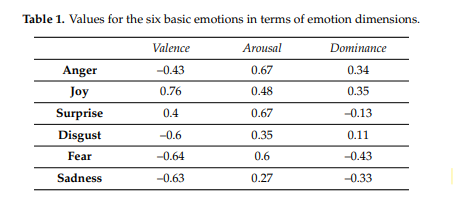

*Источник изображения: "Emotion Classification Based on Biophysical Signals
and Machine Learning Techniques" by Oana Bălan, Gabriela Moise, Livia Petrescu, Alin Moldoveanu, Marius Leordeanu and Florica Moldoveanu*

В этой таблице нет значения для эмоции contempt (презрение), его мы возьмем из второй таблицы. Однако там значения для valence ранжируются от 1 до 7 (в нашем случае от -1 до 1). Аппрокисмируя значения valence-arousal для **contempt** на заданный интервал, мы получаем **valence = 0.23**, **arousal = 0.66**
Также возьмем значение **arousal** для **surprise** из второй таблицы, чтобы не было повторений, оно равняется **0.56**.
Для **neutral** значения **valence** и **arousal** равны **0** и **0** соответсвенно.
Для неопределенной эмоции (**uncertain**), мы будем выбирать значение **valence-arousal** случайным образом из заданного интервала.

Интервал значений valence (-1, 1).

Интервал значений arousal (0, 1)


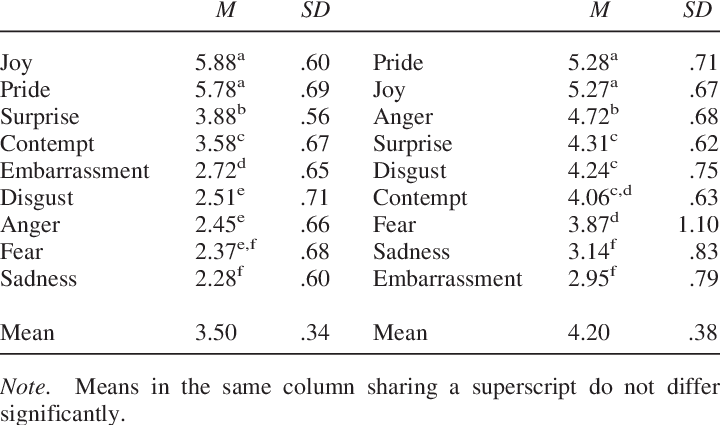

*Источник изображения: "Moving Faces, Looking Places: Validation of the Amsterdam Dynamic Facial Expression Set (ADFES)" by Skyler Hawk, Agneta H Fischer, Bertjan Doosje*

In [ ]:
# Вспомним как выглядит наш датасет

df.head()

,Unnamed: 0,image_path,emotion,class
0,0,train/anger/0.jpg,anger,0
1,1,train/anger/1.jpg,anger,0
2,2,train/anger/10.jpg,anger,0
3,3,train/anger/100.jpg,anger,0
4,4,train/anger/1000.jpg,anger,0


In [ ]:
# Создадим словари valence_mapping и arousal_mapping, содержащие значения valence и arousal соответсвенно для каждой эмоции
valence_mapping = {'anger': -0.43, 
                   'happy': 0.76,
                   'neutral': 0.0,
                   'contempt': 0.23,
                   'disgust': -0.6,
                   'fear': -0.64,
                   'sad': -0.63,
                   'surprise': 0.4,
                   'uncertain': None}

arousal_mapping = {'anger': 0.67,
                   'happy': 0.48,
                   'neutral': 0.0,
                   'contempt': 0.66,
                   'disgust': 0.35,
                   'fear': 0.6,
                   'sad': 0.27,
                   'surprise': 0.56,
                   'uncertain': None}

In [ ]:
# Добавляем столбцы valence и arousal в датафрейм, содеражщие соответсвующие значения для всех эмоций, кроме uncertain

df['valence'] = df.emotion.map(valence_mapping)
df['arousal'] = df.emotion.map(arousal_mapping)

In [ ]:
# составляем рандомный набор значений valence и arousal для эмоции uncertain
k = len(df[df.emotion=='uncertain'])
val_uncertain = random.choices([-0.43, 0.76, 0.0, 0.23, -0.6, -0.64, -0.63, 0.4], k=k)
arous_uncertain = random.choices([0.67, 0.48, 0.0, 0.66, 0.35, 0.6, 0.27, 0.56], k=k)

In [ ]:
#смотрим соответсввующие индексы датафрейма
df[df.emotion == 'uncertain']

,Unnamed: 0,image_path,emotion,class,valence,arousal
44119,44119,train/uncertain/0.jpg,uncertain,8,NaN,NaN
44120,44120,train/uncertain/1.jpg,uncertain,8,NaN,NaN
44121,44121,train/uncertain/10.jpg,uncertain,8,NaN,NaN
44122,44122,train/uncertain/100.jpg,uncertain,8,NaN,NaN
44123,44123,train/uncertain/1000.jpg,uncertain,8,NaN,NaN
...,...,...,...,...,...,...
50041,50041,train/uncertain/995.jpg,uncertain,8,NaN,NaN
50042,50042,train/uncertain/996.jpg,uncertain,8,NaN,NaN
50043,50043,train/uncertain/997.jpg,uncertain,8,NaN,NaN
50044,50044,train/uncertain/998.jpg,uncertain,8,NaN,NaN


In [ ]:
# Меняем значения столбцов valence и arousal для эмоции uncertain в датафрейме
df.iloc[44119:, 4] = val_uncertain

In [ ]:
df.iloc[44119:, 5] = arous_uncertain

In [ ]:
# Проверяем
df[df.emotion == 'uncertain']

,Unnamed: 0,image_path,emotion,class,valence,arousal
44119,44119,train/uncertain/0.jpg,uncertain,8,0.00,0.27
44120,44120,train/uncertain/1.jpg,uncertain,8,0.23,0.27
44121,44121,train/uncertain/10.jpg,uncertain,8,0.23,0.27
44122,44122,train/uncertain/100.jpg,uncertain,8,0.76,0.48
44123,44123,train/uncertain/1000.jpg,uncertain,8,0.00,0.48
...,...,...,...,...,...,...
50041,50041,train/uncertain/995.jpg,uncertain,8,-0.63,0.48
50042,50042,train/uncertain/996.jpg,uncertain,8,-0.43,0.00
50043,50043,train/uncertain/997.jpg,uncertain,8,-0.43,0.60
50044,50044,train/uncertain/998.jpg,uncertain,8,-0.43,0.60


Этап 1

Обучим НС определять значение valence по изображению

In [ ]:
#Теперь напишем нейронную сеть, которая будем принимать изображение на входе и значением на выходе будет valence для соответсвующего изображения
#Пусть это также будет fine-tuning предобученной модели, но в последнем слое будет один нейрон

#Сначала создадим генераторы изображений

class Generators3Type:

    '''Создание тренировочного и валидационного генератора'''

    def __init__(self, train_df, test_df, y_col):
        self.batch_size = BATCH_SIZE
        self.img_size = (IMAGE_SIZE, IMAGE_SIZE)
        self.y_col = y_col

        _datagen = ImageDataGenerator(                            # Создаем генераторы данных с искусственным расширением обучающего датасета,
            rescale=1./255.,                                      # аугментацией
            validation_split=0.05,                                # Размер валидационного датасета 5%               
            featurewise_center=False,
            featurewise_std_normalization=False,
            width_shift_range=0.1,                                # Смещение по ширине - максимум 10 %
            height_shift_range=0.1,                               # Смещение по высоте - максимум 10 %
            horizontal_flip=True,                                 # Отражение относительно центральной вертикали
            brightness_range=[0.9, 1.1],                          # Шкала затемнения-осветления изображения
            zoom_range=0.1                                        # Степень приближения-отдаления
        )

        # Тренировочный генератор

        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=df,
            directory=str(data_folder),
            x_col='image_path',
            y_col=self.y_col,                                    #y_col равно valence или arousal в зависимости от того, какую НС обучаем
            subset='training',
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode='raw',                                    # class_mode='raw' соответсвует задачам регресии, то, что нас интересует 
            target_size=self.img_size)
        print('Тренировочный генератор создан')

        # Валидационный генератор

        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=df,
            directory=str(data_folder),
            x_col='image_path',
            y_col=self.y_col,
            subset='validation',
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode='raw',
            target_size=self.img_size
        )
        print('Валидационный генератор создан')
        # Тестовый генератор (без аугментации)
        _test_datagen=ImageDataGenerator(rescale=1./255.)
        self.test_generator = _test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory = str(test_data_folder),
            x_col='image_path',
            y_col=None,
            class_mode = None,
            batch_size=1,
            seed=42,
            shuffle=False,
            target_size=self.img_size)
        print('Тестовый генератор создан')

In [ ]:
# Создаем генераторы
generators_3_type = Generators3Type(df, test_df, 'valence') #создаем генераторы для столбца valence
print('Генераторы созданы')

Found 47544 validated image filenames.
Тренировочный генератор создан
Found 2502 validated image filenames.
Валидационный генератор создан
Found 5000 validated image filenames.
Тестовый генератор создан
Генераторы созданы


In [ ]:
# класс EmotionModelValenceArousal отличается от используемого ранее в основном деталями компиляции модели, loss и метрика

class EmotionModelValenceArousal:
    '''Класс для образования экземпляров различных экспериментов по созданию модели для опредеоения эмоций.
    Создает, компилирует, обучает, измеряет время инференса,
    Делает предсказания для тестового датасета'''

    def __init__(self, generators, batch_size, architecture, low_limit=3):
        self.generators = generators
        self.model = architecture
        self.low_limit = low_limit # по условию нижняя допустимая временная граница инференса 3 кадра/c
        self.throughput = False 
        self.checkpoint = None
        self.cpt_filename = 'checkpoint_best.h5'
        self.batch_size = batch_size

    def loss_optimizer(self, learning_rate, path_to_folder):
        ''' Определяет алгоритм оптимизации и лосс'''
        
        metr = tf.keras.metrics.MeanAbsoluteError()
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=opt, loss='mse', metrics=[metr])
        
        path = Path(path_to_folder)
        path.mkdir(exist_ok=True)
        cpt_path = str(path/self.cpt_filename)

        self.checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='loss', verbose=1, save_best_only=True, mode='min')


    def learn(self, epochs, path_to_folder, val_steps, train_steps):
        '''Обучение модели'''

        self.model.fit(self.generators.train_generator, validation_data=self.generators.val_generator, epochs=epochs, validation_steps=val_steps, callbacks=[PlotLossesCallback(), self.checkpoint], steps_per_epoch=train_steps)
        self.model = load_model(path_to_folder + '/' + self.cpt_filename)

    def inference_time(self):
        '''Производит расчет времени инференса'''

        sample_images, sample_labels = next(self.generators.train_generator)

        N_warmup_run = 50
        N_run = 500
        elapsed_time = []
        for i in range(N_warmup_run):
            preds = self.model.predict(sample_images)
            
        for i in range(N_run):
            start_time = time.time()
            preds = self.model.predict(sample_images)
            end_time = time.time()
            elapsed_time = np.append(elapsed_time, end_time - start_time)
            if i % 50 == 0:
                print('Step {}: {}ms'.format(i, (elapsed_time[-50:].mean())*1000))
        
        throughput = N_run * self.batch_size / elapsed_time.sum()
        print('Throughput: {:.0f} images/s'.format(throughput))
        if throughput < self.low_limit:
            print('Превышено допустимое время инференса. Оптимизируйте модель')
        else:
            self.throughput = True
            print('Инференс в пределах допустимого')
            
    def predict_test(self, dimension): #добавляем аргумент dimension, соответствующий тому, какую модель мы обучаем, определяющую valence или arousal
        '''Делает предсказания для тестового датасета,
        оформляет их в csv файл на отправку'''

        self.generators.test_generator.reset()

        filenames = self.generators.test_generator.filenames
        nb_samples = len(filenames)

        predictions = self.model.predict(self.generators.test_generator, verbose=1, steps=nb_samples)
        predictions = predictions.flatten()
        
        
        results=pd.DataFrame({'image_path': filenames,
                              dimension: list(predictions)})
        results.to_csv(dimension + '_model_res.csv', index=False)
        print('Файл csv создан')

In [ ]:
# Обновим функцию определяющую pipeline эксперимента
# добавим аргумент dimension, соответствующий тому, какую модель мы обучаем, определяющую valence или arousal

def experiment_pipe_val_arous(model, learning_rate, epochs, val_steps, train_steps, dimension, path_to_folder='model'):

    '''Реализует pipeline проведения эксперимента для одной модели распознавания эмоций'''

    print('Измеряем время инференса модели')
    model.inference_time() #Если время инференса позволяет, то pipeline продолажет реализовываться
    if model.throughput:
        print()
        print('-'*30)
        print('Определяем алгоритм оптимизации и лосс')
        model.loss_optimizer(learning_rate, path_to_folder) #компиляция
        
        print()
        print('-'*30)
        print('Обучаем модель')
        model.learn(epochs, path_to_folder, val_steps, train_steps) #обучение

        print()
        print('-'*30)
        print('Осуществляем предсказания модели на тестовом датасете')
        model.predict_test(dimension) #предсказание


In [ ]:
# Скачиваем предобученную модель VGGFace2
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:01<00:00, 141MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
#Отрезаем последние полносвязные слои от базовой модели, оставляем все слои обучаемыми

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

In [ ]:
architecture_valence = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='linear'),
                                      tf.keras.layers.Dense(1, activation='tanh') # valence ранжируется в пределах (-1, 1), cоответсвенно в последнем слое оставляем 1 нейрон
                                      ])                                          # c функцией активации tanh которая также дает выход в пределах (-1, 1)

In [ ]:
# Создадим экземпляр класса EmotionModelValenceArousal

emotion_model_valence = EmotionModelValenceArousal(generators=generators_3_type, architecture=architecture_valence, batch_size=BATCH_SIZE)

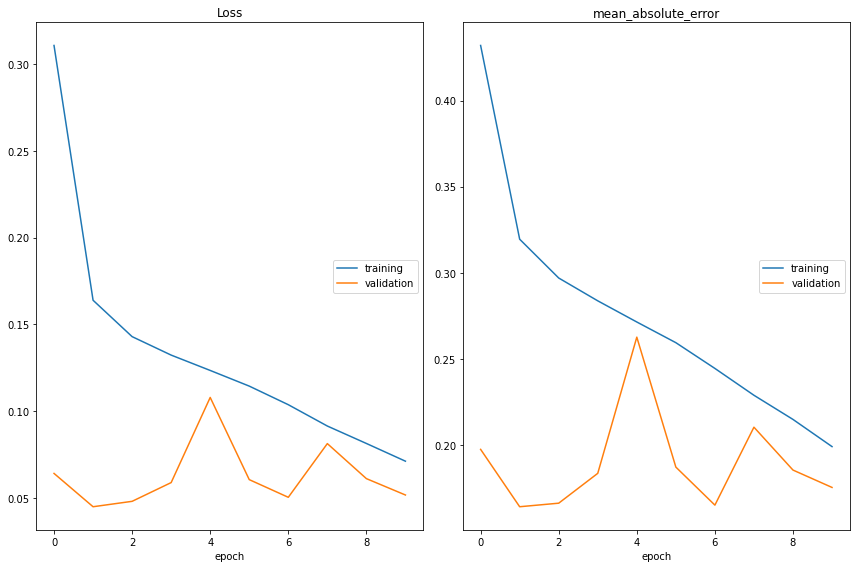

Loss
	training         	 (min:    0.071, max:    0.311, cur:    0.071)
	validation       	 (min:    0.045, max:    0.108, cur:    0.052)
mean_absolute_error
	training         	 (min:    0.199, max:    0.432, cur:    0.199)
	validation       	 (min:    0.164, max:    0.263, cur:    0.175)

Epoch 00010: loss improved from 0.08132 to 0.07110, saving model to emotion_model_valence/checkpoint_best.h5
742/742 [==============================] - 909s 1s/step - loss: 0.0711 - mean_absolute_error: 0.1990 - val_loss: 0.0516 - val_mean_absolute_error: 0.1752

------------------------------
Осуществляем предсказания модели на тестовом датасете
5000/5000 [==============================] - 1909s 382ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 47544 - количество изображений в тренировочном генераторе, 2502 - валидационный генератор

experiment_pipe_val_arous(model=emotion_model_valence, learning_rate=0.00001, epochs=10, dimension='valence', path_to_folder='emotion_model_valence', train_steps=(47544//BATCH_SIZE), val_steps=(2502//BATCH_SIZE))

Этап 2

Научим НС определять значение arousal по изображению

In [ ]:
# Создаем генераторы
generators_3_type = Generators3Type(df, test_df, 'arousal') #создаем генераторы для столбца valence
print('Генераторы созданы')

Found 47544 validated image filenames.
Тренировочный генератор создан
Found 2502 validated image filenames.
Валидационный генератор создан
Found 5000 validated image filenames.
Тестовый генератор создан
Генераторы созданы


In [ ]:
# Скачиваем предобученную модель VGGFace2
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 322MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
#Отрезаем последние полносвязные слои от базовой модели, оставляем все слои обучаемыми

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

In [ ]:
architecture_arousal = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='linear'),
                                      tf.keras.layers.Dense(1, activation='sigmoid') #  arousal ранжируется в пределах (0, 1), cоответсвенно в последнем слое оставляем 1 нейрон
                                      ])                                          # c функцией активации sigmoid которая также дает выход в пределах (0, 1)

In [ ]:
# Создадим экземпляр класса EmotionModelValenceArousal

emotion_model_arousal = EmotionModelValenceArousal(generators=generators_3_type, architecture=architecture_arousal, batch_size=BATCH_SIZE)

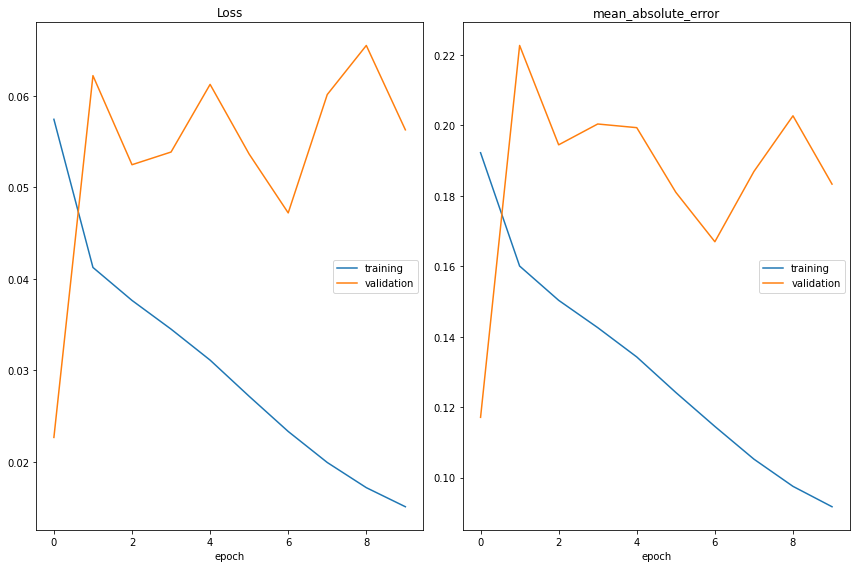

Loss
	training         	 (min:    0.015, max:    0.057, cur:    0.015)
	validation       	 (min:    0.023, max:    0.066, cur:    0.056)
mean_absolute_error
	training         	 (min:    0.092, max:    0.192, cur:    0.092)
	validation       	 (min:    0.117, max:    0.223, cur:    0.183)

Epoch 00010: loss improved from 0.01718 to 0.01509, saving model to emotion_model_arousal/checkpoint_best.h5
742/742 [==============================] - 894s 1s/step - loss: 0.0151 - mean_absolute_error: 0.0917 - val_loss: 0.0563 - val_mean_absolute_error: 0.1833

------------------------------
Осуществляем предсказания модели на тестовом датасете
5000/5000 [==============================] - 72s 14ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 47544 - количество изображений в тренировочном генераторе, 2502 - валидационный генератор

experiment_pipe_val_arous(model=emotion_model_arousal, learning_rate=0.00001, epochs=10, dimension='arousal', path_to_folder='emotion_model_arousal', train_steps=(47544//BATCH_SIZE), val_steps=(2502//BATCH_SIZE))

Этап 3

Обучим НС определять эмоцию по значениям valence и arousal

Модель представляет собой multi-layer perceprton (MLP), или как ее еще называют полносвязная НС, в отличие от используемых ранее сверточных нейронных сетей (CNN), которые работали с изображениями.

In [ ]:
#Выделим из основного датафрейма тренировочный, содержащий значения valence, arousal и target values class. 
train_df = df[['valence', 'arousal', 'class']]

In [ ]:
train_df.head()

,valence,arousal,class
0,-0.43,0.67,0
1,-0.43,0.67,0
2,-0.43,0.67,0
3,-0.43,0.67,0
4,-0.43,0.67,0


In [ ]:
val_array = train_df.valence.values

In [ ]:
arous_array = train_df.arousal.values

In [ ]:
# Создадим тренировочный набор данных X
X = np.c_[val_array, arous_array]
X

array([[-0.43,  0.67],
       [-0.43,  0.67],
       [-0.43,  0.67],
       ...,
       [-0.43,  0.6 ],
       [-0.43,  0.6 ],
       [-0.63,  0.56]])

In [ ]:
# target values
y = train_df['class'].astype(int).values
y

array([0, 0, 0, ..., 8, 8, 8])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

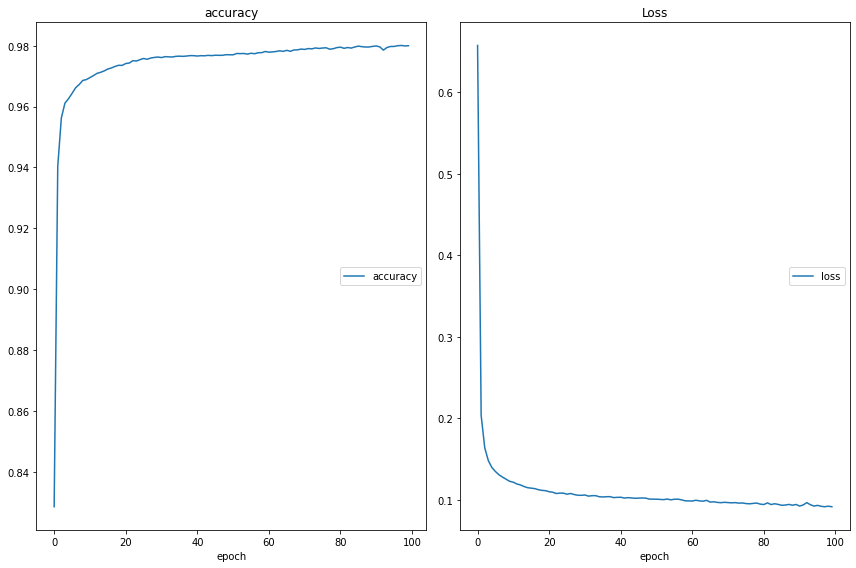

accuracy
	accuracy         	 (min:    0.829, max:    0.980, cur:    0.980)
Loss
	loss             	 (min:    0.091, max:    0.658, cur:    0.091)

Epoch 00100: loss did not improve from 0.09136
1564/1564 [==============================] - 4s 2ms/step - loss: 0.0914 - accuracy: 0.9800


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

path = Path('model_valence_arousal')
path.mkdir(exist_ok=True)
cpt_filename = 'checkpoint_best.h5'
cpt_path = str(path/cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(X, y, epochs=100, callbacks=[PlotLossesCallback(), checkpoint])

In [ ]:
model_valence_arousal = load_model("model_valence_arousal/checkpoint_best.h5")

In [ ]:
#Теперь подготовим тестовый набор данных
df_valence = pd.read_csv('/content/valence_model_res.csv')

In [ ]:
df_valence.head()

,image_path,valence
0,0.jpg,-0.746521
1,1.jpg,-0.099308
2,2.jpg,-0.545237
3,3.jpg,-0.860245
4,4.jpg,0.048401


In [ ]:
df_arousal = pd.read_csv('/content/arousal_model_res.csv')
df_arousal.head()

,image_path,arousal
0,0.jpg,0.498265
1,1.jpg,0.428383
2,2.jpg,0.381998
3,3.jpg,0.392282
4,4.jpg,0.534914


In [ ]:
test_valence = df_valence.valence.values
test_arousal = df_arousal.arousal.values

X_test = np.c_[test_valence, test_arousal]

In [ ]:
X_test

array([[-0.74652117,  0.49826488],
       [-0.0993076 ,  0.42838266],
       [-0.54523748,  0.38199788],
       ...,
       [ 0.09782625,  0.14702724],
       [-0.64142454,  0.28314382],
       [ 0.01220198,  0.65159667]])

In [ ]:
# Осуществим предсказания модели для тестового набора данных

predictions = model_valence_arousal.predict(X_test)

In [ ]:
predictions = [np.argmax(i) for i in predictions]

In [ ]:
mapping_rev = dict((v, k) for (k, v) in mapping.items())
mapping_rev

{0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise',
 8: 'uncertain'}

In [ ]:
predict_emotions = [mapping_rev[i] for i in predictions]

In [ ]:
img = list(df_arousal.image_path.values)

In [ ]:
# Запишем итоговый датафрейм в csv файл 
results = pd.DataFrame({'image_path': img,
                        'emotion': predict_emotions})
results.to_csv('valence_arousal_model_res.csv', index=False)

Результатом подобного подхода стал score:

private leaderboard - **0.16480**

public leaderboard- **0.16920**

Не самый худший результат, но и не удовлетворительный по сравнению с подходом, когда модель обучается на самих эмоциях.

Это связано с тем, что в действительности каждое изображение оценивается по шкалaм valence и arousal несколькими наблюдателями, затем берется некое среднее значение, которое и присваивается изображению. В данной работе такой подход неосуществим, поэтому у нас изображениям из одной категории эмоций ставятся в соответсвие одинаковые значения  valence и arousal, что дает негативный отклик качеству модели.
Также, я думаю, подход со случайными значениями valence и arousal для категории 
'uncertain', показал себя крайне неудачным.
Однако ради интереса, попробуем сделать еще одну попытку, 
оставим все то же самое, что и в прошлый раз, однако, уберем изображения категории uncertain из тренировочного датасета. 
И будем обучать модель классифицировать изображения не на 9 категорий, а на 8.
Это значит, заведомо неверный ответ для изображений категории uncertain в тестовом датасете. Однако тем не менее, возможно, такой подход даст более стабильный результат, чем предыдущий.


*Попытка 2 (дополнительная)*



In [ ]:
# Уберем изображения категории uncertain из датафрейма

df = df[df.emotion != 'uncertain']

Этап 1

Обучим НС определять значение valence по изображению

In [ ]:
# Создаем генераторы 
generators_valence = Generators3Type(df, test_df, 'valence') #создаем генераторы для столбца valence
print('Генераторы созданы')

Found 41914 validated image filenames.
Тренировочный генератор создан
Found 2205 validated image filenames.
Валидационный генератор создан
Found 5000 validated image filenames.
Тестовый генератор создан
Генераторы созданы


In [ ]:
# Скачиваем предобученную модель VGGFace2
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:02<00:00, 58.8MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
#Отрезаем последние полносвязные слои от базовой модели, оставляем все слои обучаемыми

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

In [ ]:
architecture_valence = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='linear'),
                                      tf.keras.layers.Dense(1, activation='tanh') # valence ранжируется в пределах (-1, 1), cоответсвенно в последнем слое оставляем 1 нейрон
                                      ])                                          # c функцией активации tanh которая также дает выход в пределах (-1, 1)

In [ ]:
# Создадим экземпляр класса EmotionModelValenceArousal

emotion_model_valence = EmotionModelValenceArousal(generators=generators_valence, architecture=architecture_valence, batch_size=BATCH_SIZE)

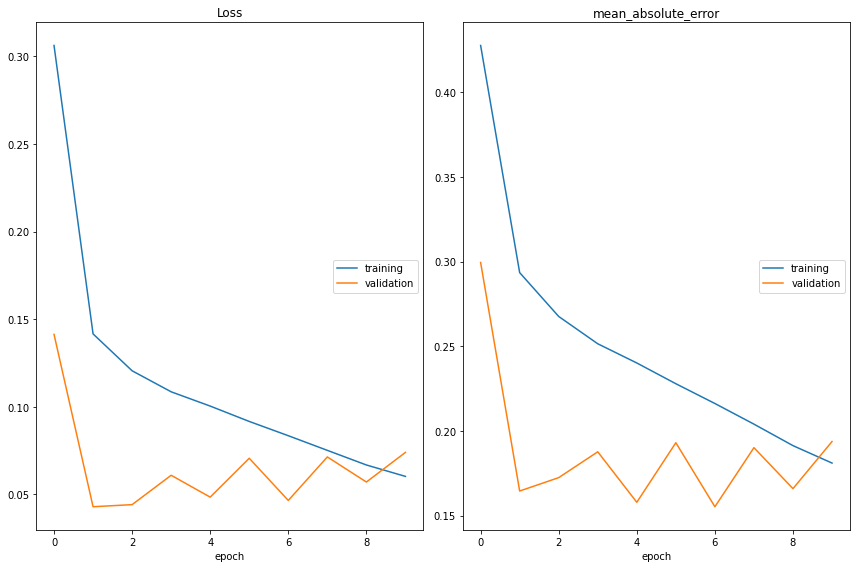

Loss
	training         	 (min:    0.060, max:    0.306, cur:    0.060)
	validation       	 (min:    0.043, max:    0.141, cur:    0.074)
mean_absolute_error
	training         	 (min:    0.181, max:    0.428, cur:    0.181)
	validation       	 (min:    0.155, max:    0.299, cur:    0.194)

Epoch 00010: loss improved from 0.06684 to 0.06033, saving model to emotion_model_valence/checkpoint_best.h5
654/654 [==============================] - 782s 1s/step - loss: 0.0603 - mean_absolute_error: 0.1811 - val_loss: 0.0740 - val_mean_absolute_error: 0.1938

------------------------------
Осуществляем предсказания модели на тестовом датасете
5000/5000 [==============================] - 2366s 473ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 41914 - количество изображений в тренировочном генераторе, 2205 - валидационный генератор

experiment_pipe_val_arous(model=emotion_model_valence, learning_rate=0.00001, epochs=10, dimension='valence', path_to_folder='emotion_model_valence', train_steps=(41914//BATCH_SIZE), val_steps=(2205//BATCH_SIZE))

Этап 2

Обучим НС определять по изображению значение arousal

In [ ]:
# Создаем генераторы
generators_arousal = Generators3Type(df, test_df, 'arousal') #создаем генераторы для столбца arousal
print('Генераторы созданы')

Found 41914 validated image filenames.
Тренировочный генератор создан
Found 2205 validated image filenames.
Валидационный генератор создан
Found 5000 validated image filenames.
Тестовый генератор создан
Генераторы созданы


In [ ]:
# Скачиваем предобученную модель VGGFace2
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:00<00:00, 382MB/s]


'resnet50face.h5'

In [ ]:
vggface_model = load_model("resnet50face.h5")

In [ ]:
#Отрезаем последние полносвязные слои от базовой модели, оставляем все слои обучаемыми

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = True

In [ ]:
architecture_arousal = tf.keras.Sequential([
                                      base_model,
                                      tf.keras.layers.Dense(2048, activation='relu'),
                                      tf.keras.layers.Dense(2048, activation='linear'),
                                      tf.keras.layers.Dense(1, activation='sigmoid') #  arousal ранжируется в пределах (0, 1), cоответсвенно в последнем слое оставляем 1 нейрон
                                      ])                                          # c функцией активации sigmoid которая также дает выход в пределах (0, 1)

In [ ]:
# Создадим экземпляр класса EmotionModelValenceArousal

emotion_model_arousal = EmotionModelValenceArousal(generators=generators_arousal, architecture=architecture_arousal, batch_size=BATCH_SIZE)

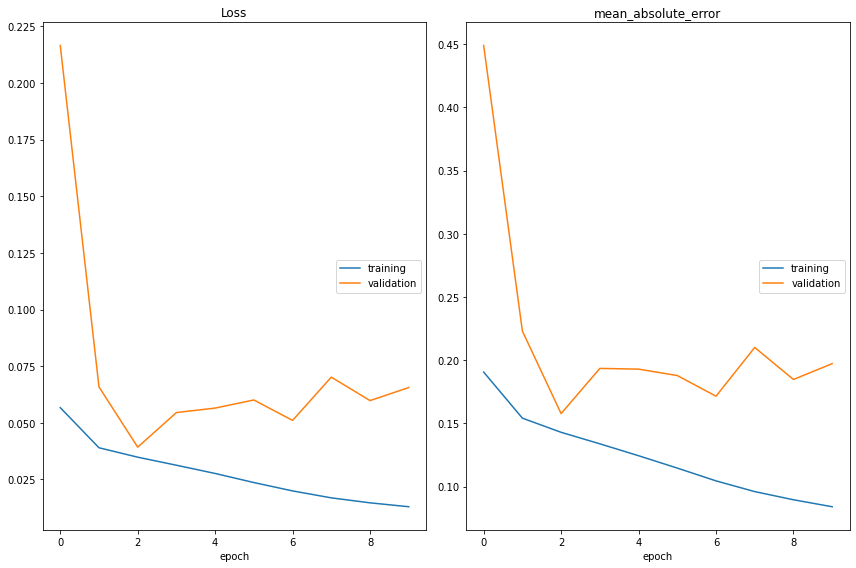

Loss
	training         	 (min:    0.013, max:    0.057, cur:    0.013)
	validation       	 (min:    0.039, max:    0.217, cur:    0.066)
mean_absolute_error
	training         	 (min:    0.084, max:    0.191, cur:    0.084)
	validation       	 (min:    0.158, max:    0.449, cur:    0.197)

Epoch 00010: loss improved from 0.01469 to 0.01297, saving model to emotion_model_arousal/checkpoint_best.h5
654/654 [==============================] - 793s 1s/step - loss: 0.0130 - mean_absolute_error: 0.0840 - val_loss: 0.0656 - val_mean_absolute_error: 0.1972

------------------------------
Осуществляем предсказания модели на тестовом датасете
5000/5000 [==============================] - 68s 14ms/step
Файл csv создан


In [ ]:
# Проведем эксперимент
# 41914 - количество изображений в тренировочном генераторе, 2205 - валидационный генератор

experiment_pipe_val_arous(model=emotion_model_arousal, learning_rate=0.00001, epochs=10, dimension='arousal', path_to_folder='emotion_model_arousal', train_steps=(41914//BATCH_SIZE), val_steps=(2205//BATCH_SIZE))

Этап 3

Обучим модель определять эмоции по значениям valence и arousal.

Модель представляет собой multi-layer perceprton (MLP), или как ее еще называют полносвязная НС, в отличие от используемых ранее сверточных нейронных сетей (CNN), которые работали с изображениями.

In [ ]:
#Выделим из основного датафрейма тренировочный, содержащий значения valence, arousal и target values class. 
train_df = df[['valence', 'arousal', 'class']]

In [ ]:
val_array = train_df.valence.values

In [ ]:
arous_array = train_df.arousal.values

In [ ]:
# Создадим тренировочный набор данных X
X = np.c_[val_array, arous_array]

In [ ]:
# target values
y = train_df['class'].astype(int).values

In [ ]:
# сделаем разбиение данных на тренировачную и валидационную части

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES-1, activation='softmax')) # NUM_CLASSES-1, потому что мы будем предсказывать 8 классов, а не 9

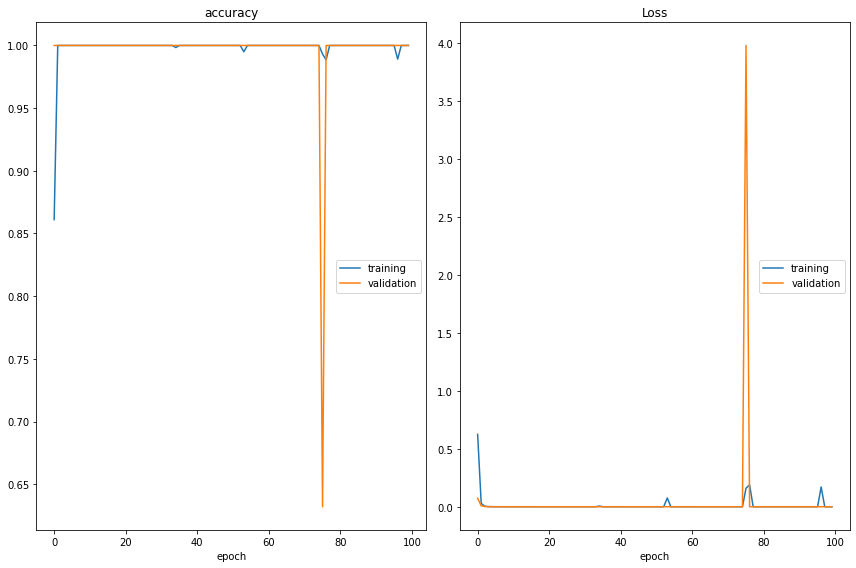

accuracy
	training         	 (min:    0.861, max:    1.000, cur:    1.000)
	validation       	 (min:    0.632, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.624, cur:    0.000)
	validation       	 (min:    0.000, max:    3.980, cur:    0.000)

Epoch 00100: loss did not improve from 0.00000
1035/1035 [==============================] - 3s 3ms/step - loss: 7.7499e-07 - accuracy: 1.0000 - val_loss: 6.1280e-07 - val_accuracy: 1.0000


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

path = Path('model_valence_arousal')
path.mkdir(exist_ok=True)
cpt_filename = 'checkpoint_best.h5'
cpt_path = str(path/cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[PlotLossesCallback(), checkpoint])

In [ ]:
model_valence_arousal = load_model("model_valence_arousal/checkpoint_best.h5")

In [ ]:
#Теперь подготовим тестовый набор данных
df_valence = pd.read_csv('/content/valence_model_res.csv')

In [ ]:
df_arousal = pd.read_csv('/content/arousal_model_res.csv')

In [ ]:
test_valence = df_valence.valence.values
test_arousal = df_arousal.arousal.values

X_test = np.c_[test_valence, test_arousal]

In [ ]:
# Осуществим предсказания для тестового набора данных.

predictions = model_valence_arousal.predict(X_test)

In [ ]:
predictions = [np.argmax(i) for i in predictions]

In [ ]:
mapping_rev = dict((v, k) for (k, v) in mapping.items())

In [ ]:
predict_emotions = [mapping_rev[i] for i in predictions]

In [ ]:
img = list(df_arousal.image_path.values)

In [ ]:
# Запишем итоговый датафрейм в csv файл 
results = pd.DataFrame({'image_path': img,
                        'emotion': predict_emotions})
results.to_csv('valence_arousal_model_res.csv', index=False)

Результат посылки на kaggle составил:


public leaderboard - **0.33760**

private leaderboard - **0.33840**


Таким образом, нам удалось добиться существенного улучшения результата работы модели по сравнению с предыдущей попыткой воплощения valence-arousal подхода, не смотря на то, что пришлось заведомо пожертвовать правильным определением одной из категорий эмоций, представленной в изначальном датасете.

Однако, это не самый лучший результат в целом, поэтому для интеграции с веб-камерой, я буду использовать сохраненную модель, основанную на fine-tuning всех слоев заранее предобученной модели VGGFace2, обученную в 11 эксперименте.

***Сравнительная таблица проведенных экспериментов и их результатов***

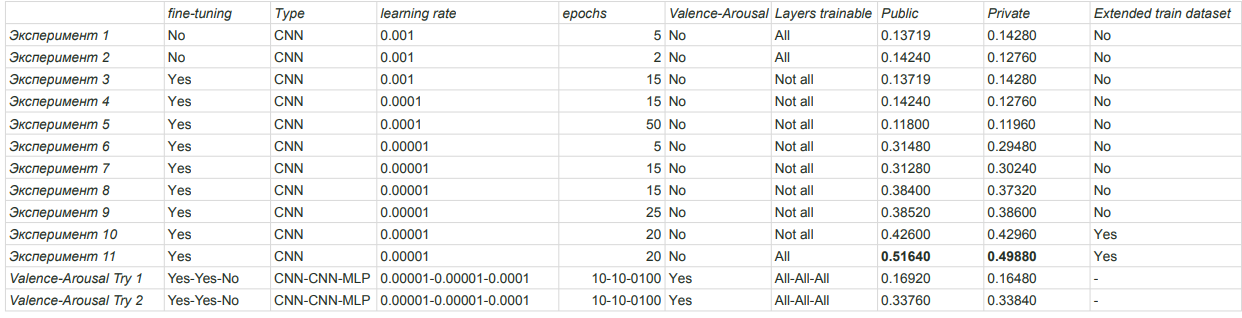

**Литература**

1. "Emotion Classification Based on Biophysical Signals
and Machine Learning Techniques" by Oana Bălan, Gabriela Moise, Livia Petrescu, Alin Moldoveanu, Marius Leordeanu and Florica Moldoveanu
2. "Exploiting multi-CNN features in CNN-RNN based Dimensional Emotion Recognition on the OMG in-the-wild Dataset" by Dimitrios Kollias and Stefanos Zafeiriou e with the Department of Computing, Imperial College London, United Kingdom
3. "AffectNet: A Database for Facial Expression,
Valence, and Arousal Computing in the Wild" by Ali Mollahosseini, Student Member, IEEE, Behzad Hasani, Student Member, IEEE,
and Mohammad H. Mahoor, Senior Member, IEEE
4. "Deep Learning of Human Emotion Recognition in Videos" by Yuqing Li, Uppsala University
5. "Advanced Deep Learning with TensorFlow 2 and Keras", 2nd edition by Rowel Atienza
6. "Moving Faces, Looking Places: Validation of the Amsterdam Dynamic Facial Expression Set (ADFES)" by Skyler Hawk, Agneta H Fischer, Bertjan Doosje
